<a href="https://colab.research.google.com/github/joel280584/bankchurn/blob/main/BankChurners_Notebook_Full_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings


#importing models
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#importing Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [3]:
bankDataDF = pd.read_csv("/content/MyDrive/MyDrive/Great Learning/Projects/BankChurners/Churn.csv")

## Data Overview

In [4]:
bankDataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bankDataDF.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [6]:
bankDataDF.drop_duplicates()
bankDataDF.shape

(10000, 14)

In [7]:
bankDataDF.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [8]:
bankDataDF.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### **Observation:**

1. The input sheet has 10000 rows and 14 features.
2. Datatypes of the data span across Int, Fload and Rince. There are 9 integer fields, 2 floats and 3 categorical datatypes. Eventhough 3 fields - 'HasCRCard', 'IsActiveMember' and 'Exited' are defined as int they hold only boolean values making them more like a categorical variable
3.  None of the rows are repeated/duplciated and no missing data found across the dataset (all columns have values). So no data imputation is required. But the fields Crediscore, Age, Balance and Estimated Salary are big float values and needs to be scaled to avoid these featurres from skewing the model learning.


## Exploratory Data Analysis

### Common Functions for Data representation

In [9]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target]).sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [11]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12,10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title(str(predictor) + " Distribution of target for target="  + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title(str(predictor) + " Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot of: " + str(predictor) + " w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) of: " + str(predictor) + " w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

In [12]:
bankDataDFImp = bankDataDF.drop(labels =['RowNumber', 'CustomerId', 'Surname'], axis=1)
results = bankDataDFImp.describe()

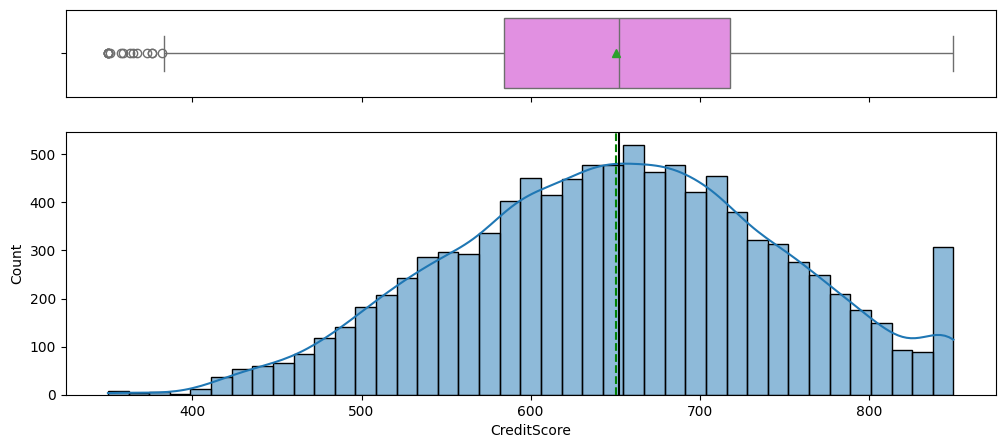

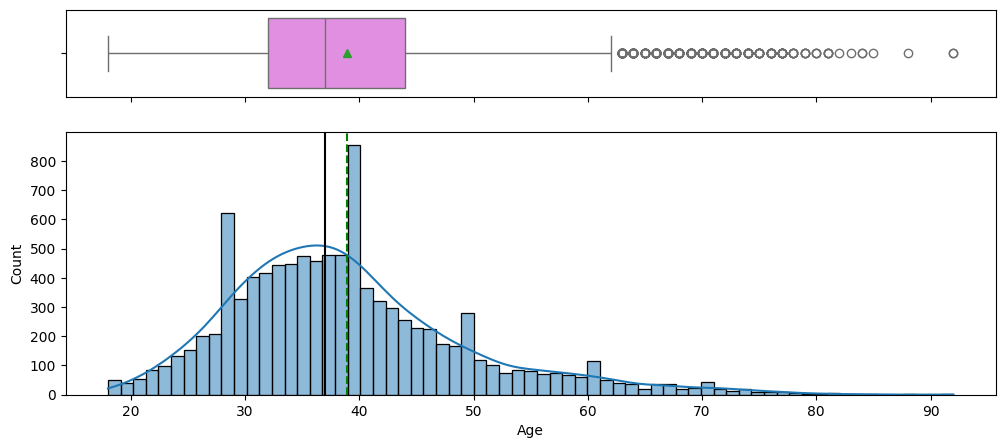

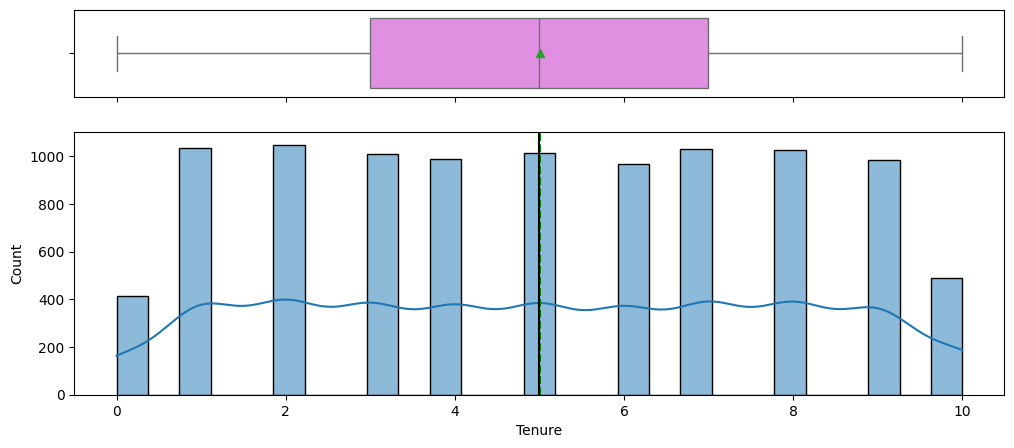

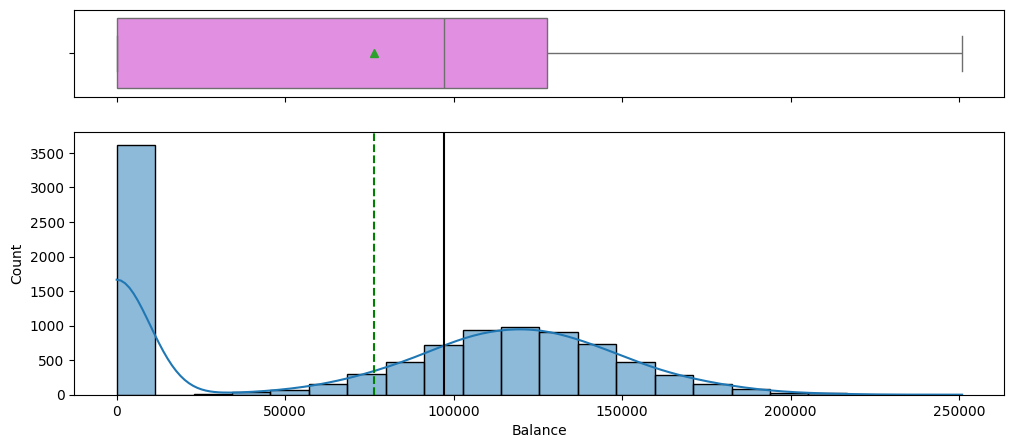

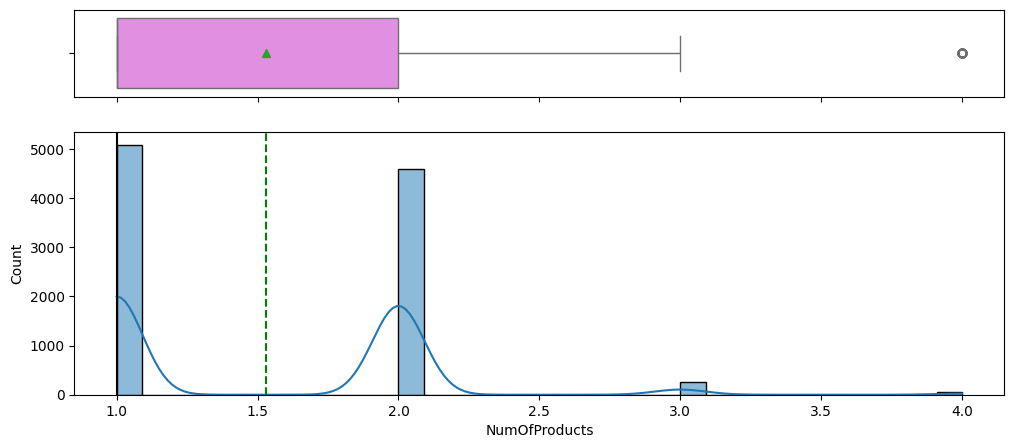

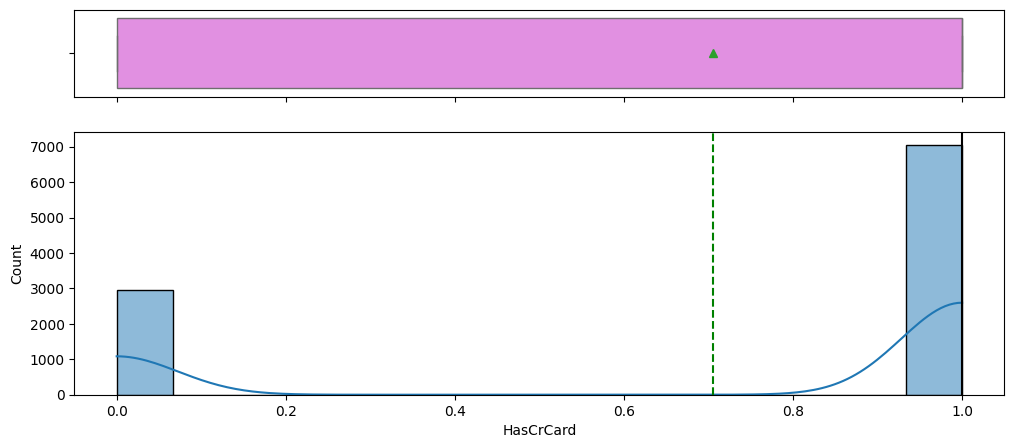

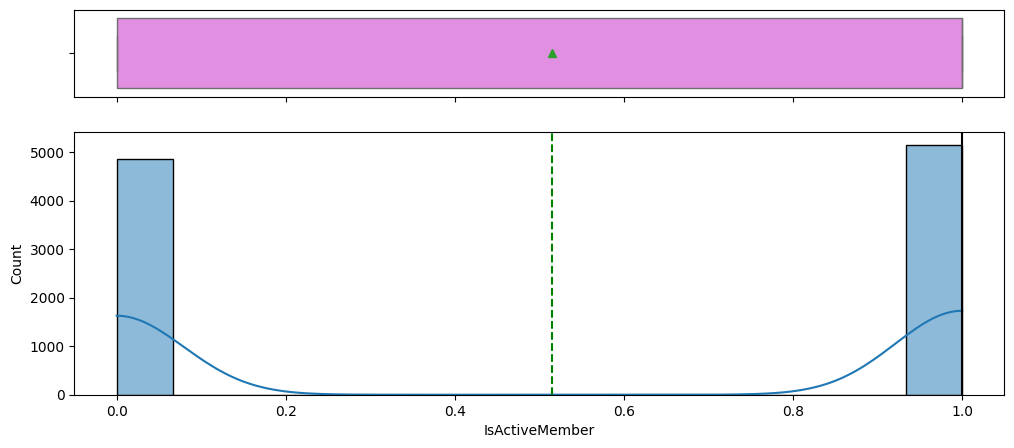

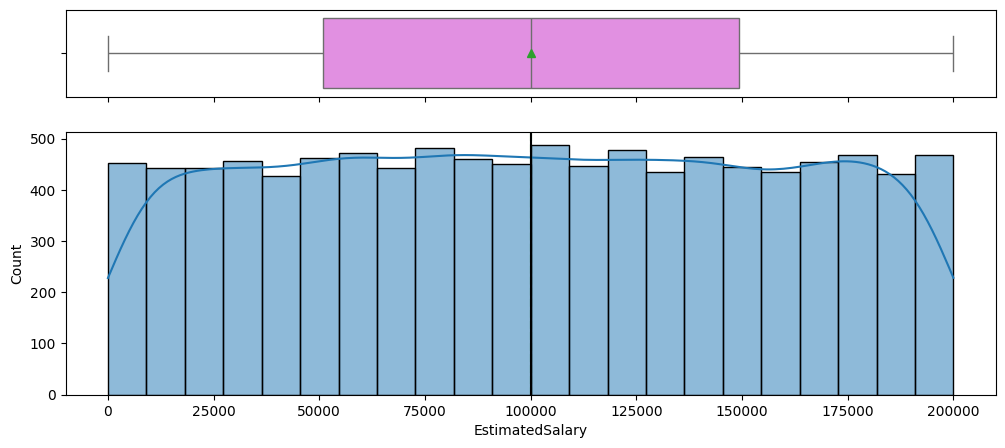

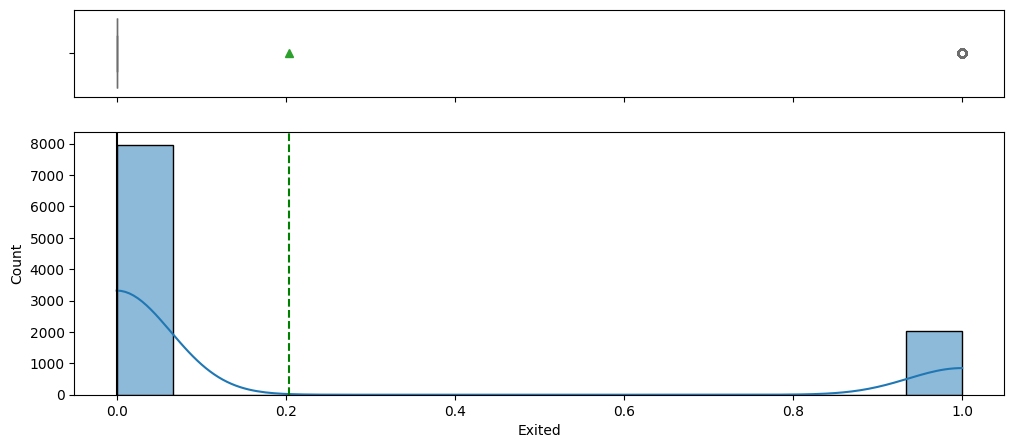

In [13]:
for features in results.columns:
  histogram_boxplot(bankDataDFImp,features,kde=True)
  plt.show()

#### **Observation**

1. Creditscore of the data is skewed left, most of the people have a score greater than the mean.
2. Age of people is skweed right and most of the people are less than mean age.
3. >25 percentile of the customers in the data have a 0 bank balance.
4. 70% of the people holds creditcard, which shows the data is skwewed left.
5. Estimated salary is multi modal and spands between a min value of 11.98 to a max value of 199992.48.
6. Approx 20% of the customers in the data left the bank. This is very much imbalanced for model training, so either the data has to be oversampled or undersampled to create a balanced data for model training.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


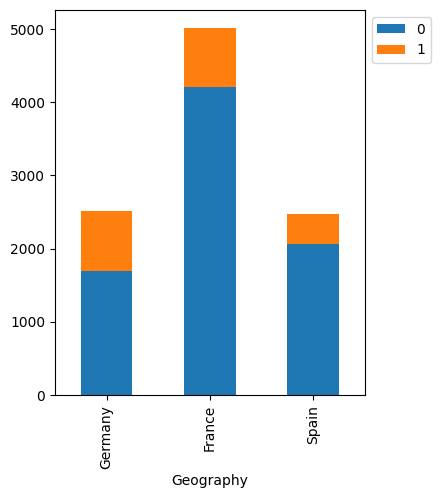

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


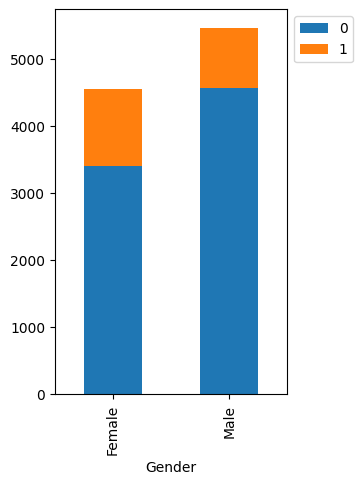

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
..       ...   ...    ...
79         4     0      4
78         5     0      5
77        10     0     10
76        11     0     11
75         9     0      9

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


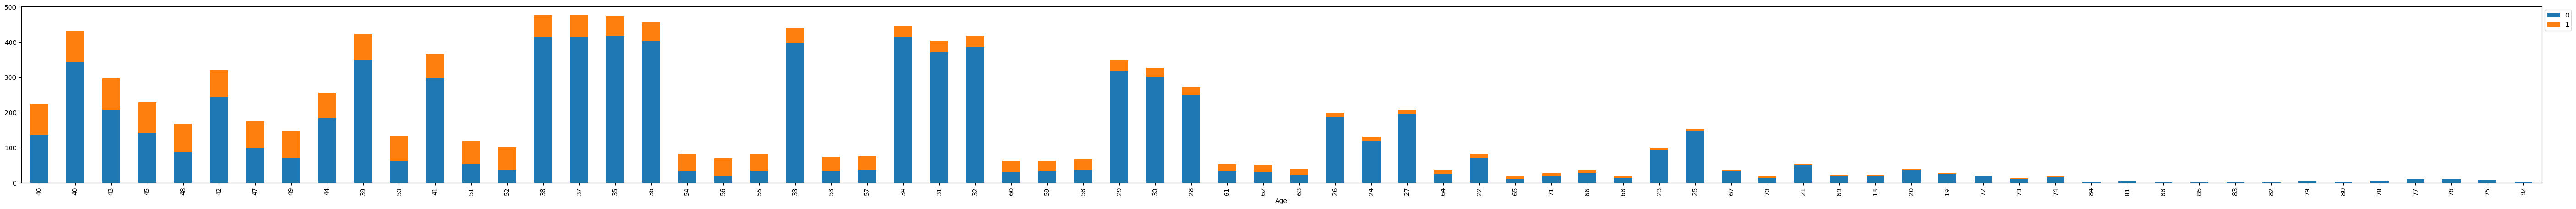

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


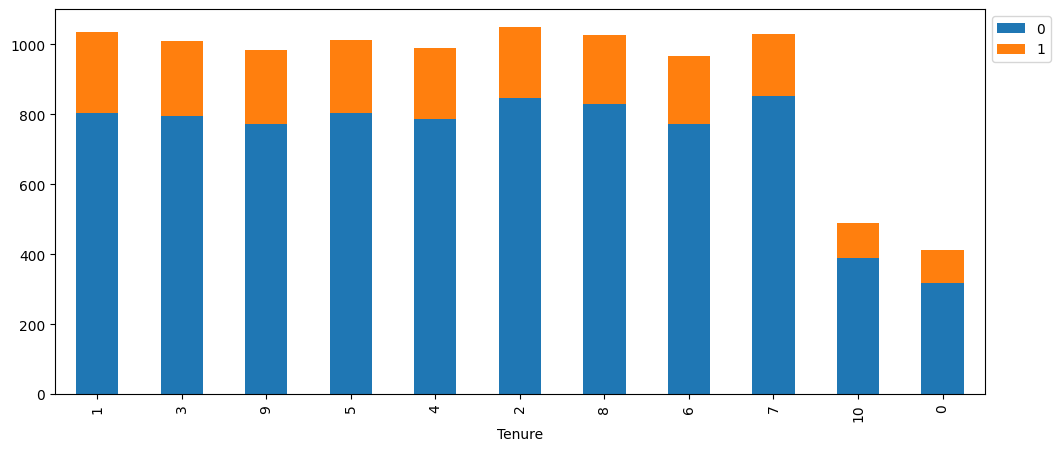

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


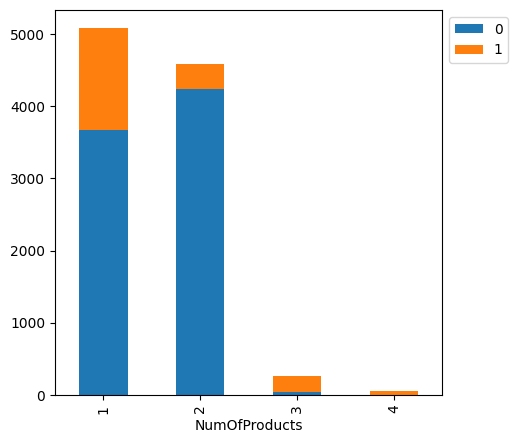

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


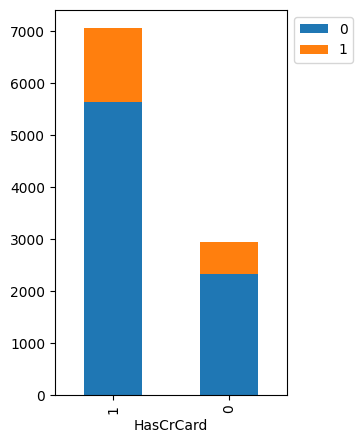

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


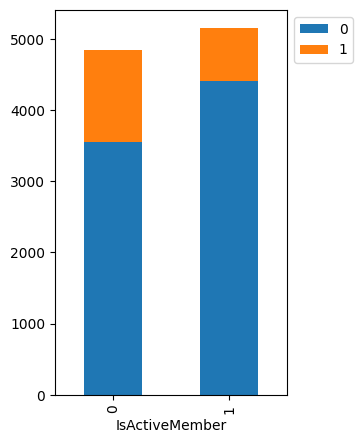

In [14]:
warnings.filterwarnings("ignore")
stacked_barplot_list = ['Geography', 'Gender', 'Age', 'Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember']
for feature in stacked_barplot_list:
    stacked_barplot(bankDataDFImp,feature,'Exited')

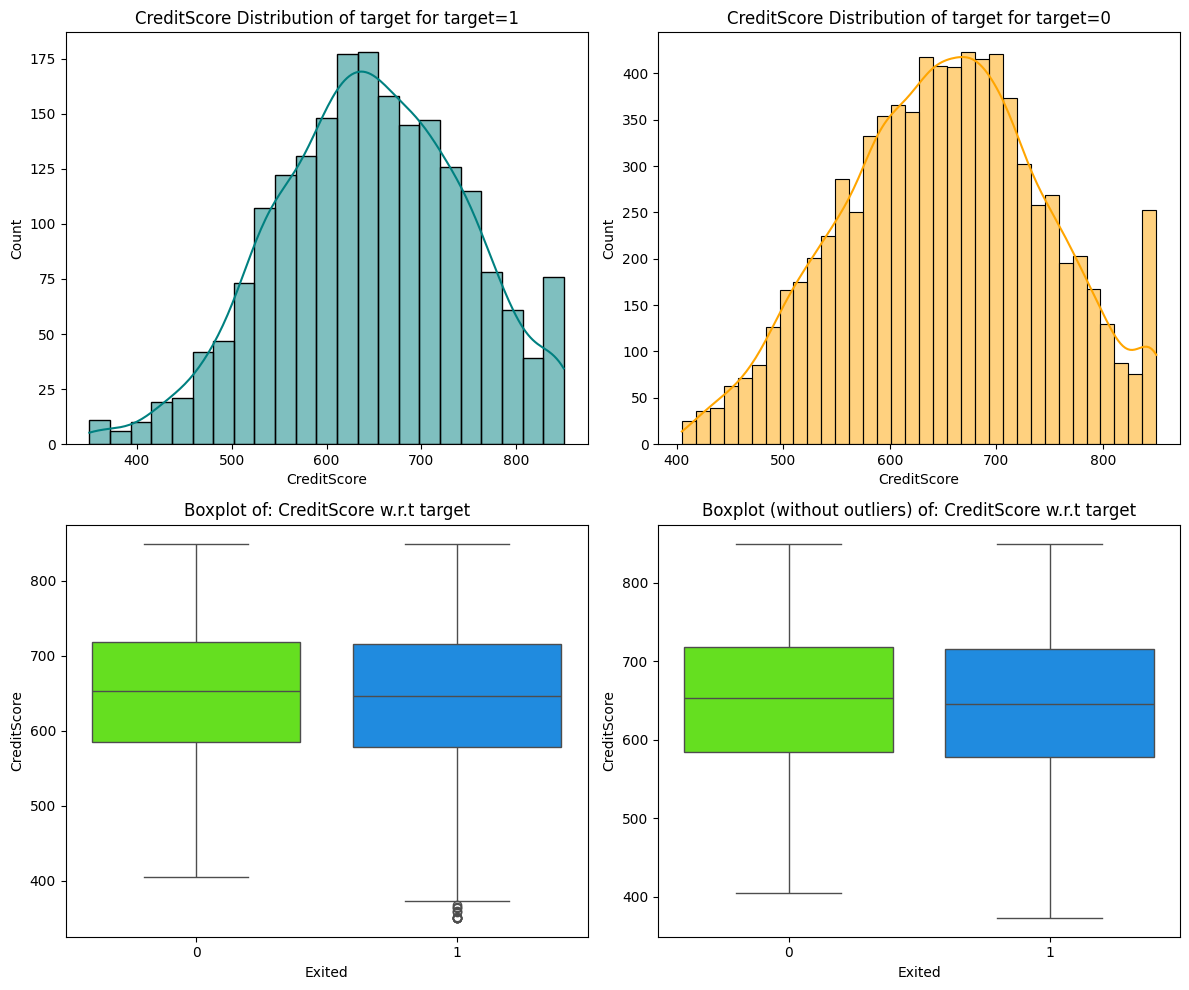

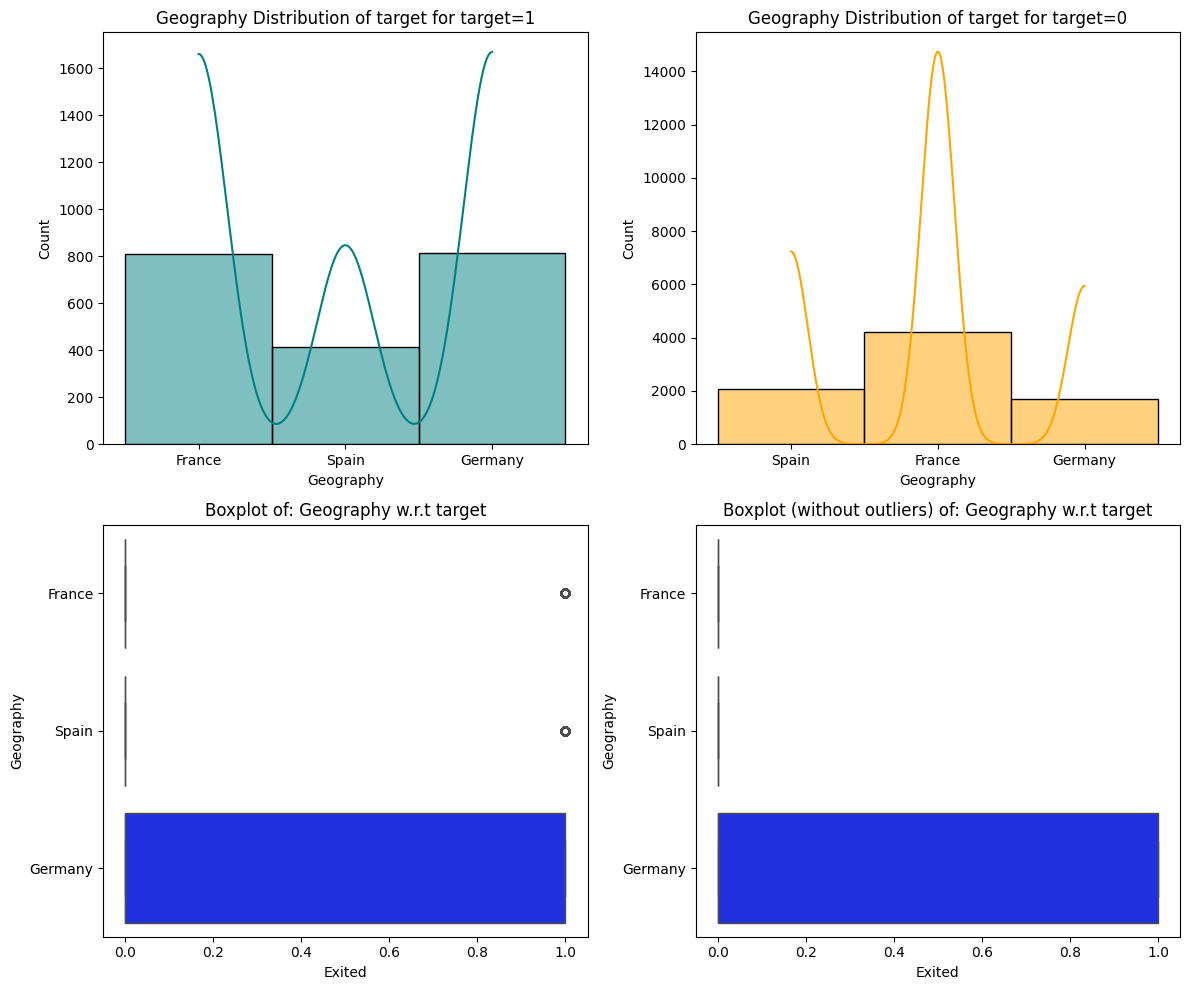

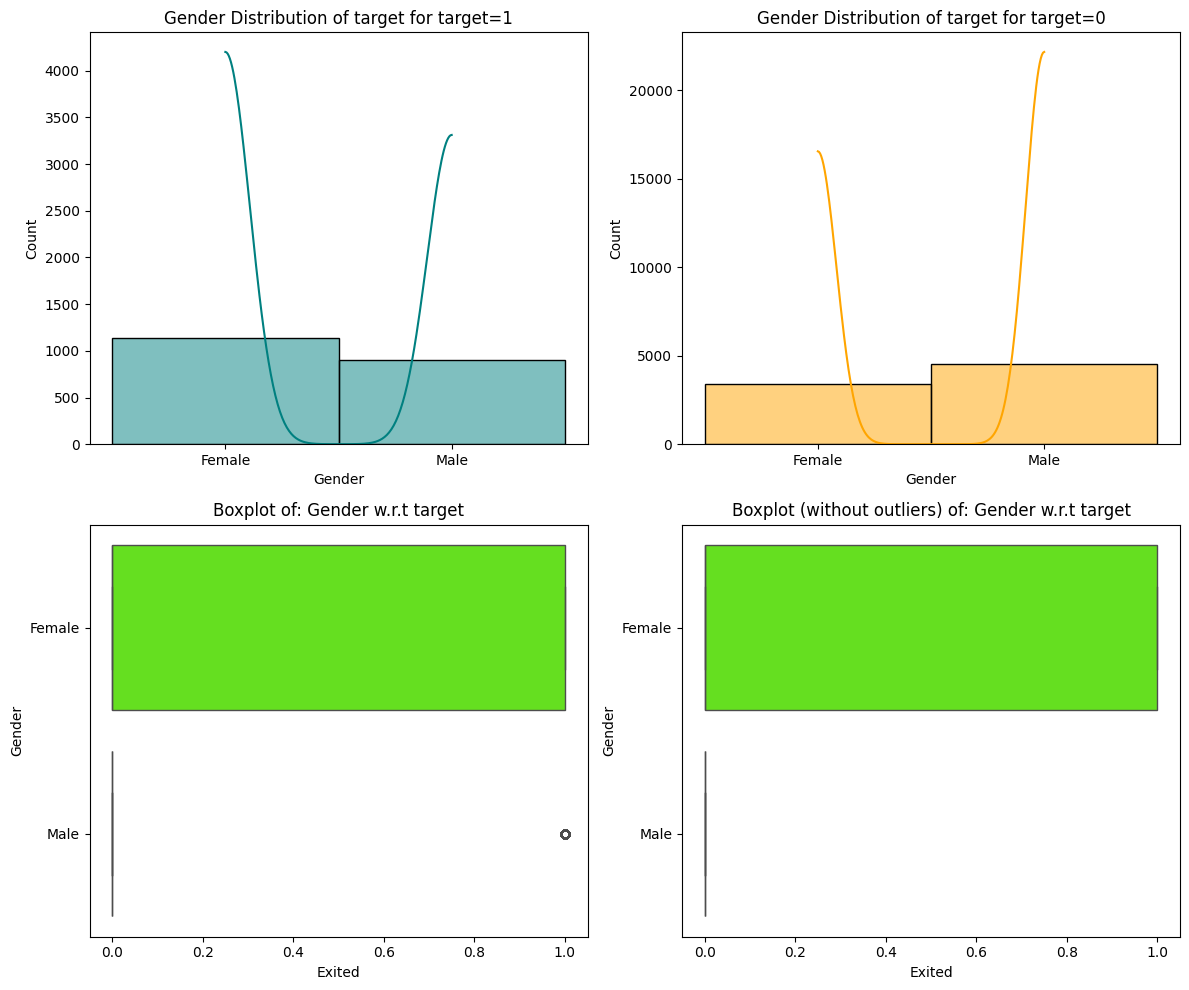

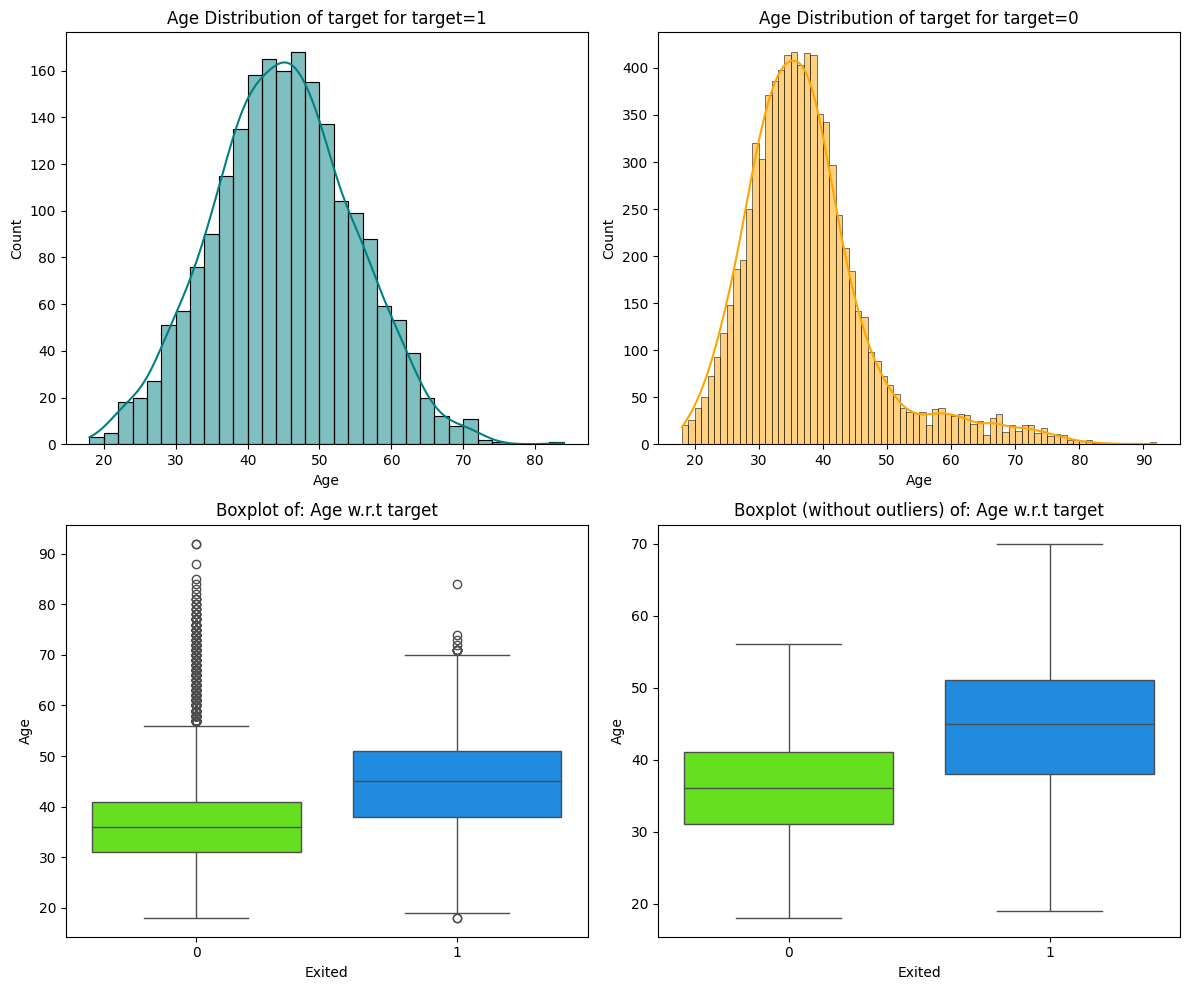

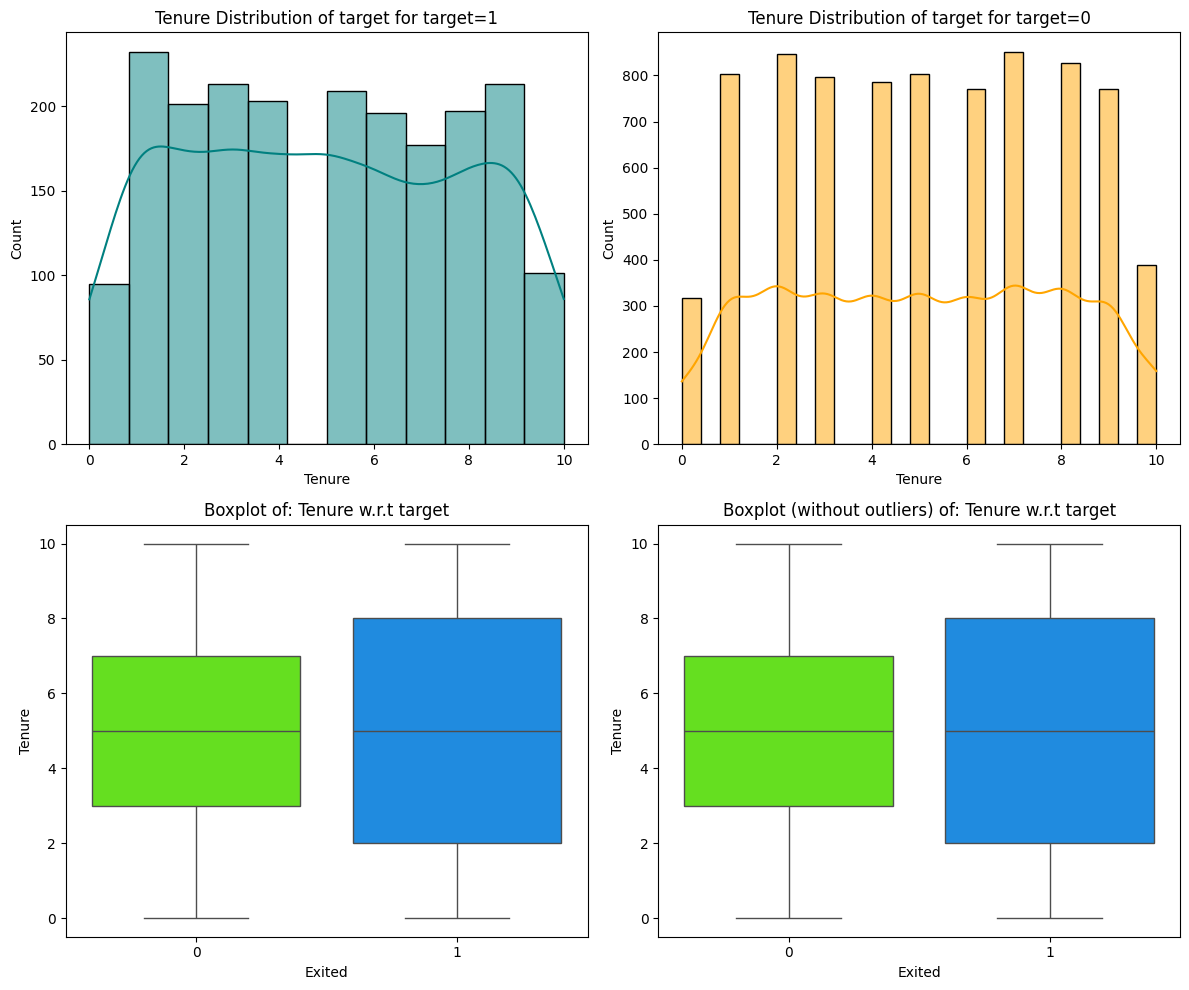

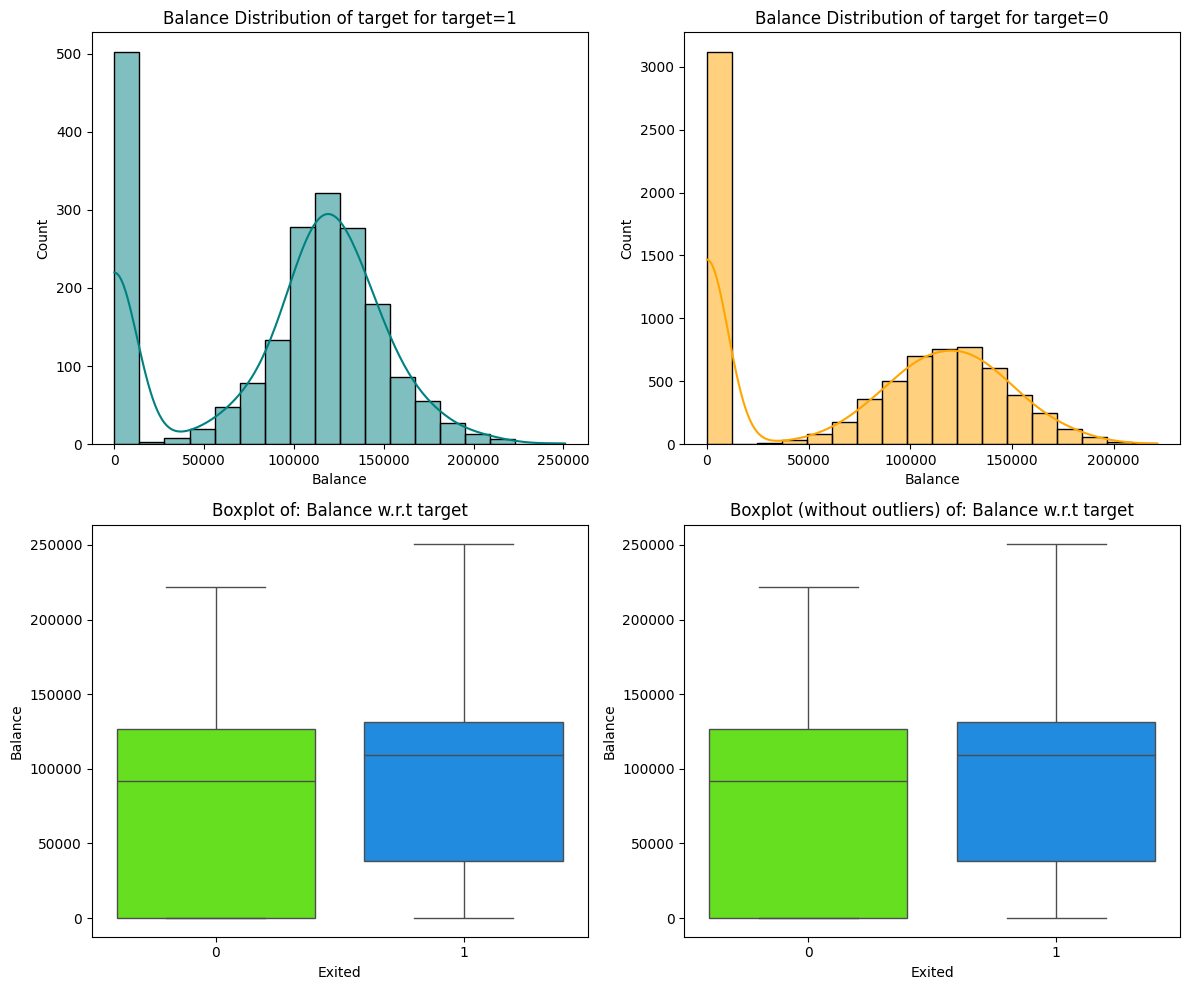

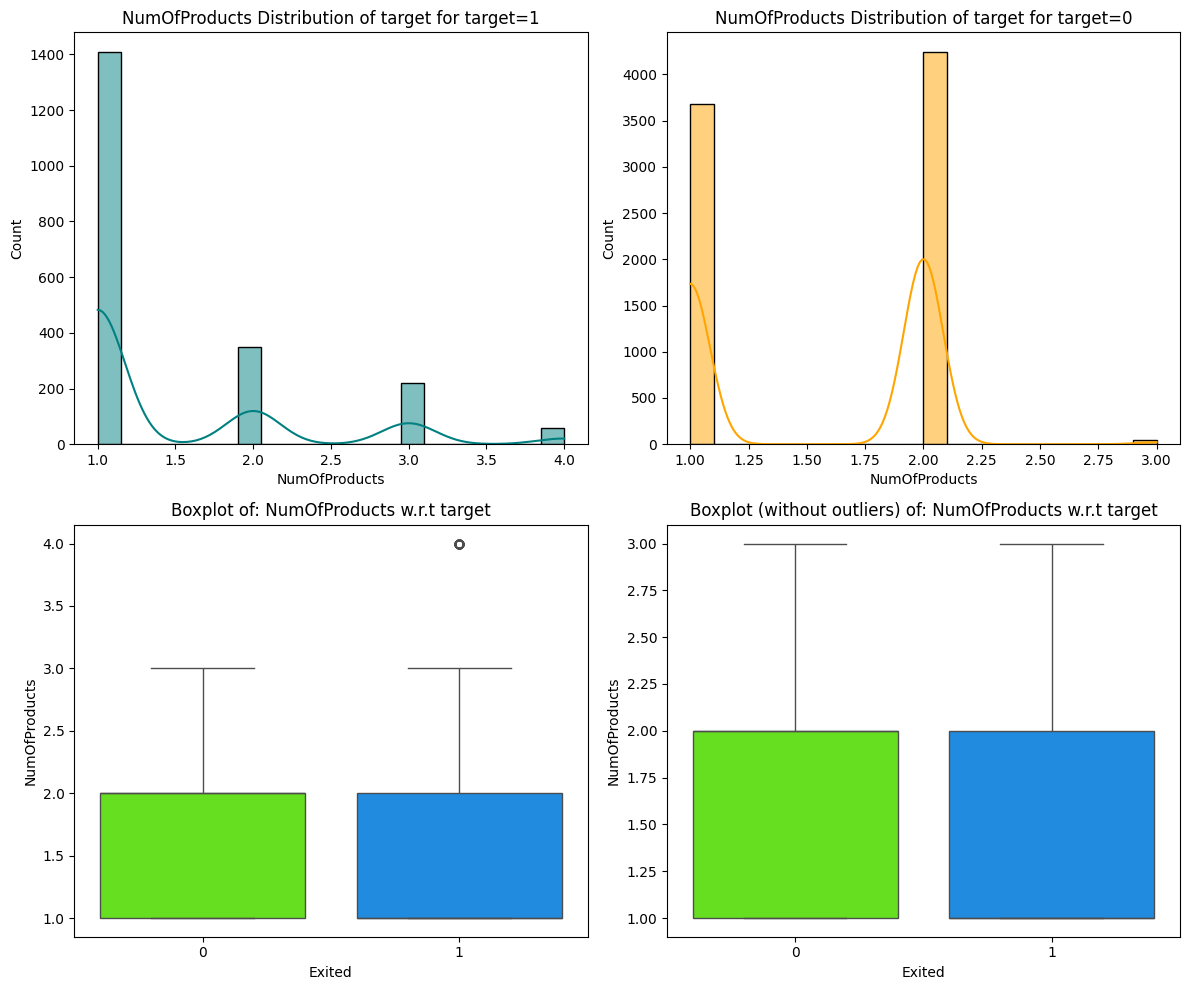

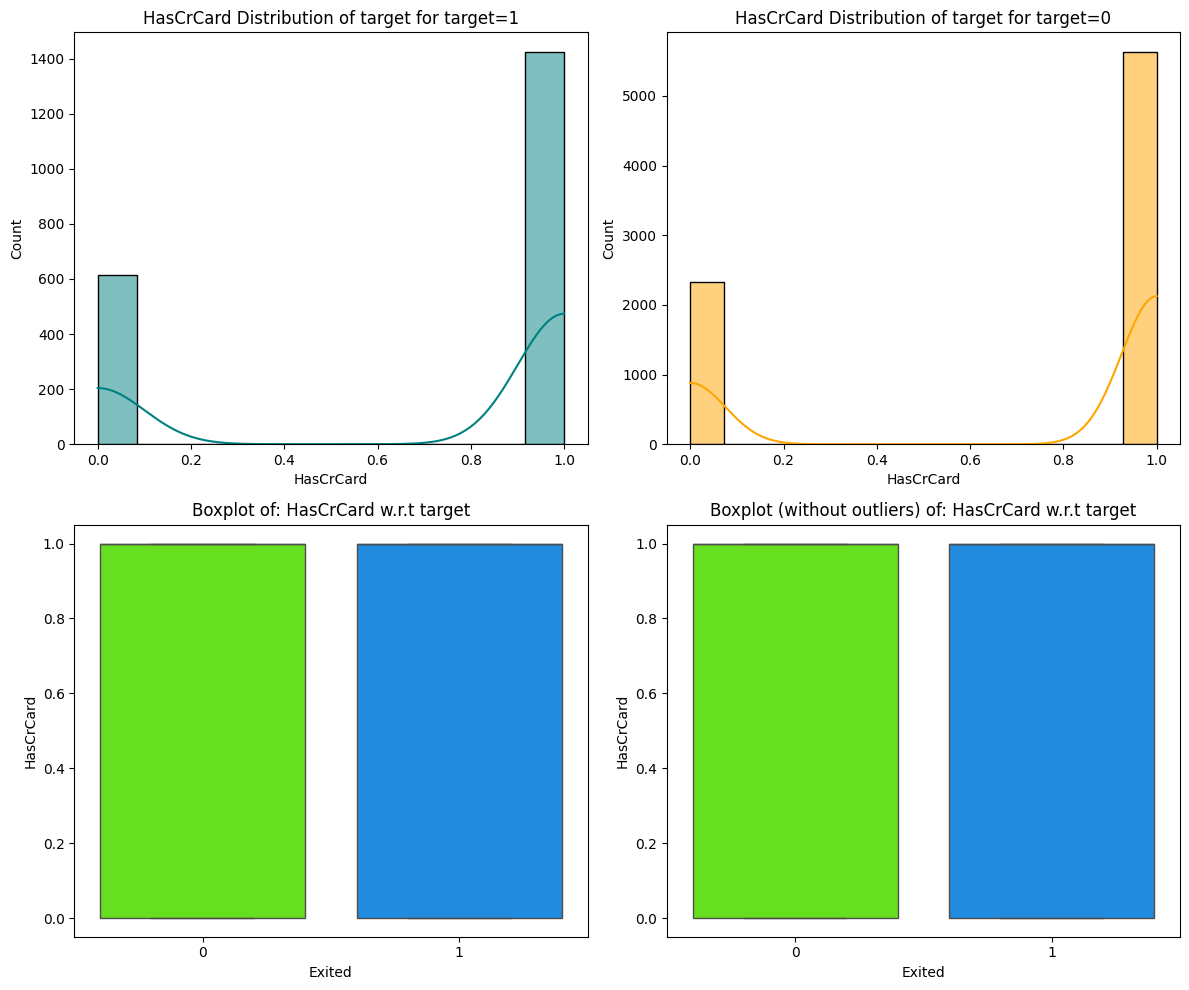

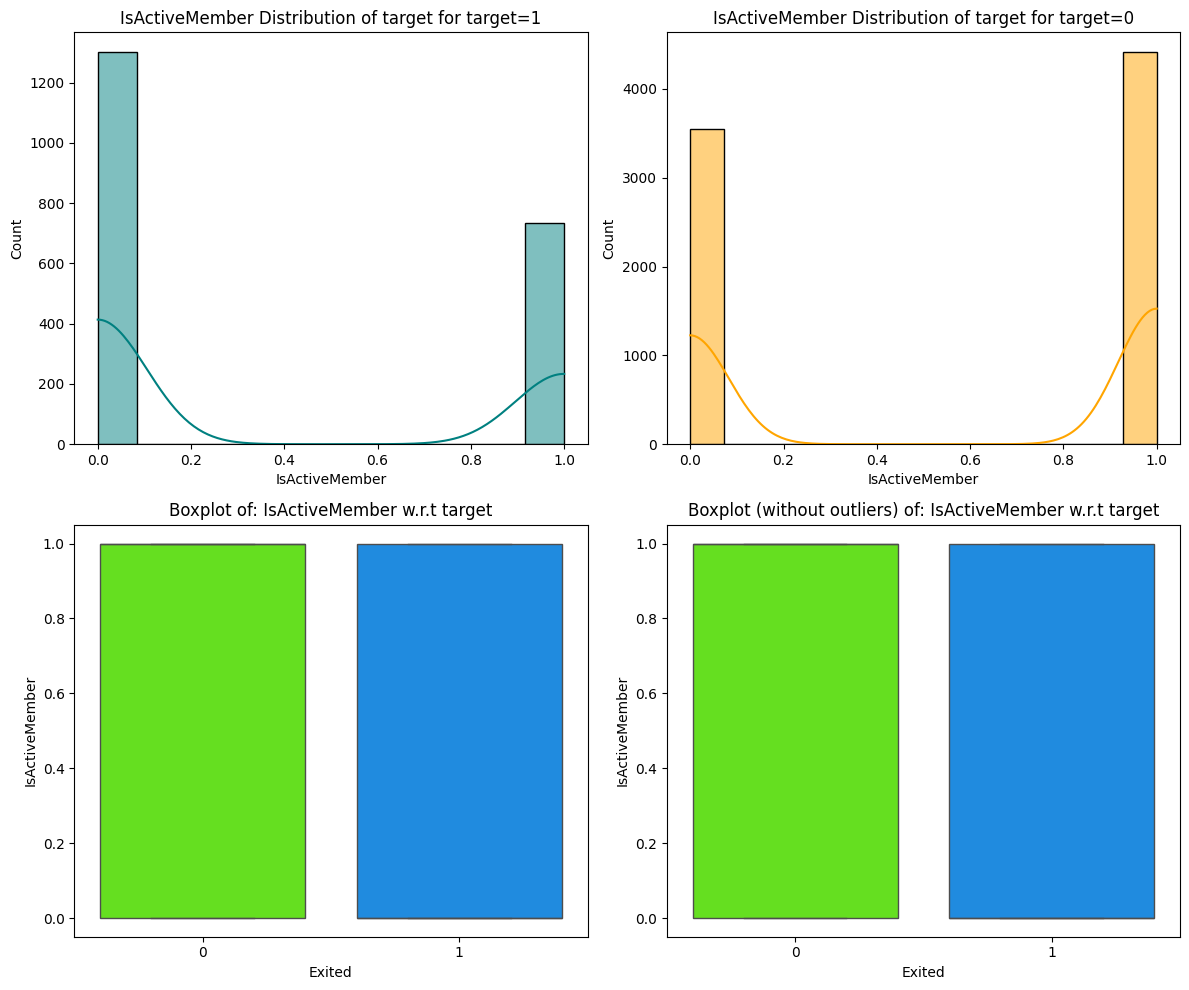

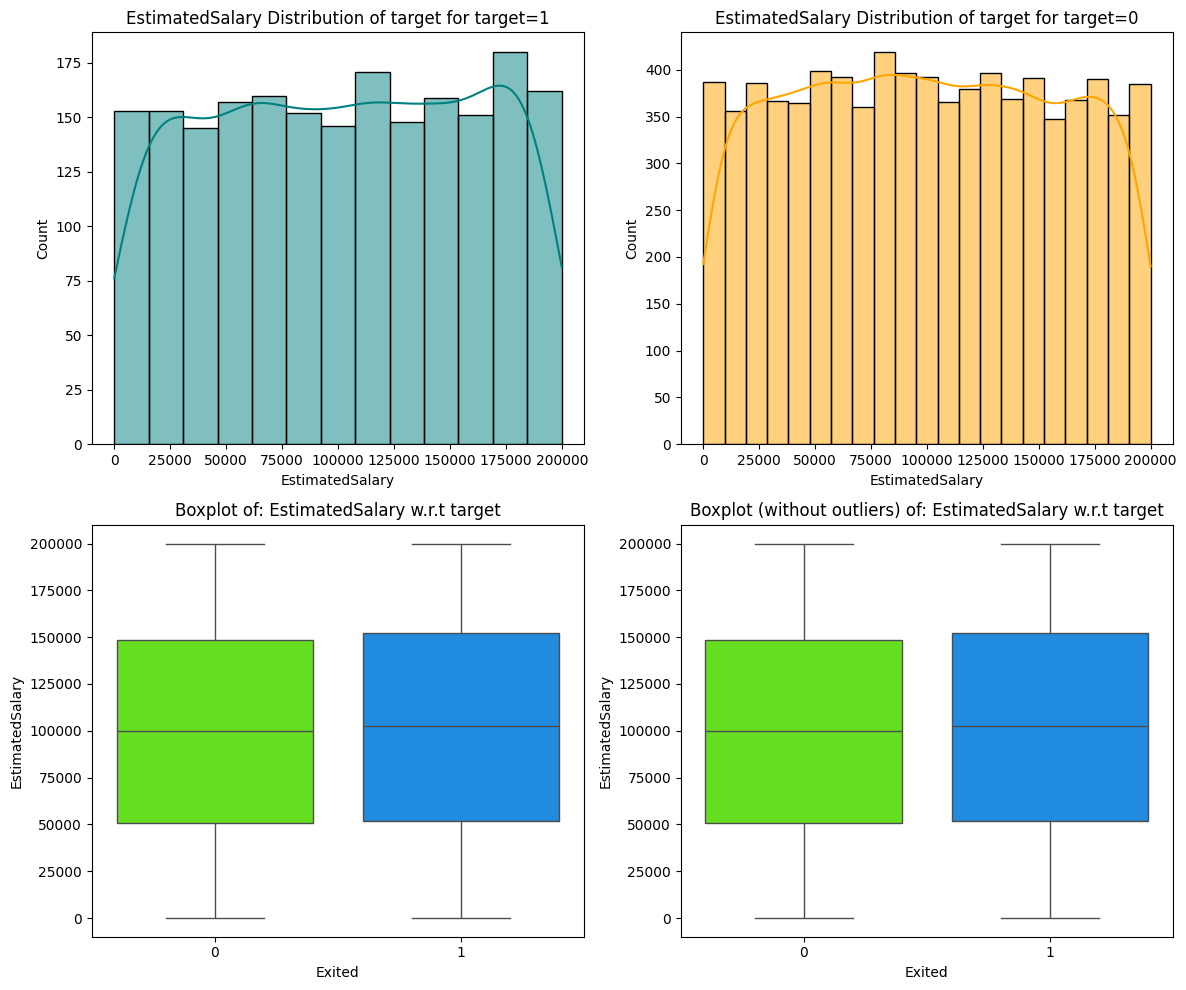

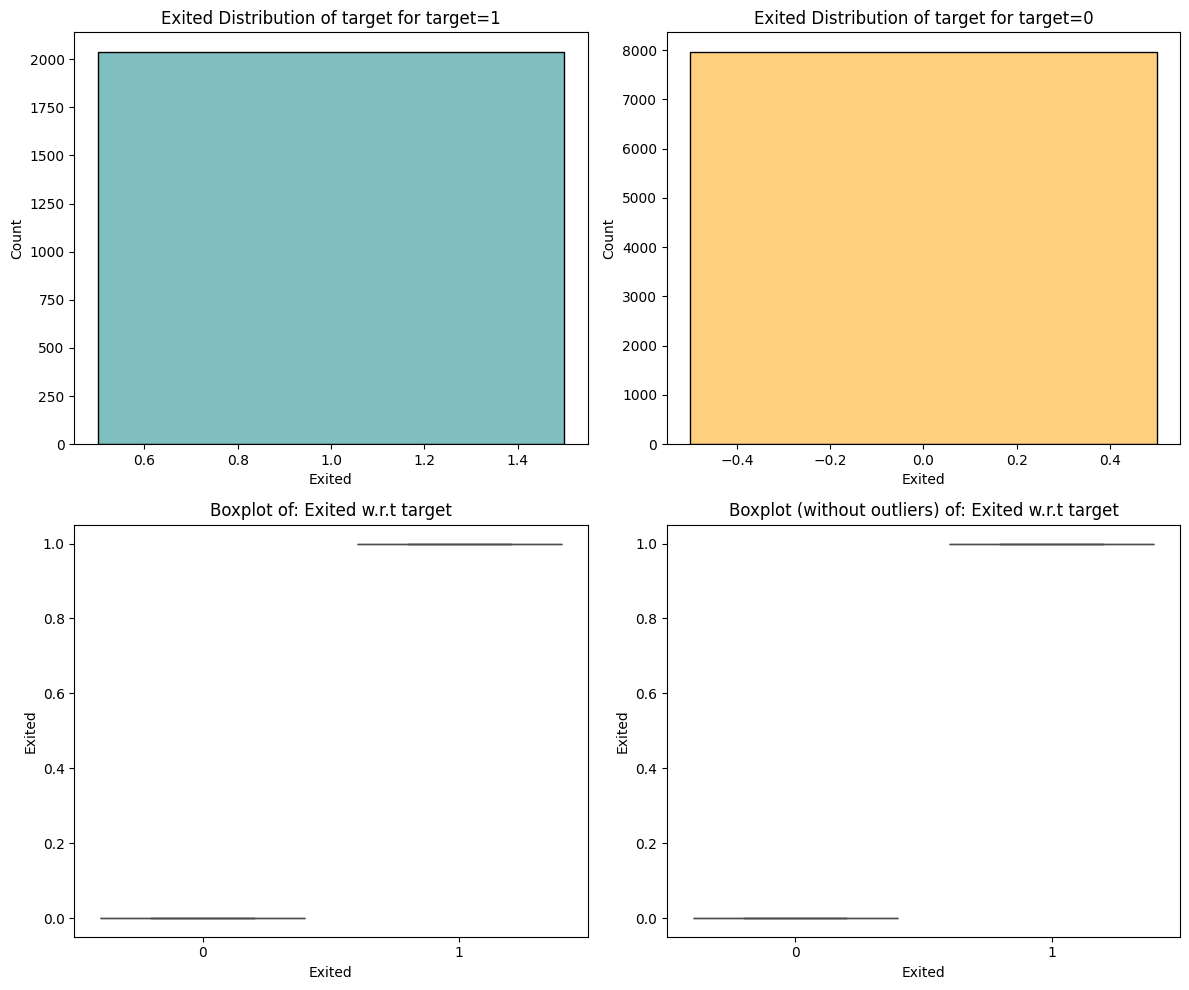

In [15]:
warnings.filterwarnings("ignore")
for feature in bankDataDFImp.columns:
    distribution_plot_wrt_target(bankDataDFImp,feature,'Exited')

#### **Observation**

1. Dataset contains customers  from 3 geographical countries and the number of customers from France is more than Spain and Germany.
2. Approx 50% of the German customers exited the bank.
3. Dataset contains approx 54% Male and 45% Females customers
4. Maximum number of products customer had owned is 4 and and all the customers who had 4 products exited the bank. Approx 79% of customers who have one or two bank products have stayed with the bank
5. Age distribution of the custeomers with regards to target =1 (exited), is skewed slightly right, and who stayedwith bank is skewed right a lot. There are many outlier customers noticed from the charts for target=0.  
6. The Range of tenue is 0 to 10 and doesnt show any skewness.


### Bivariate Analysis

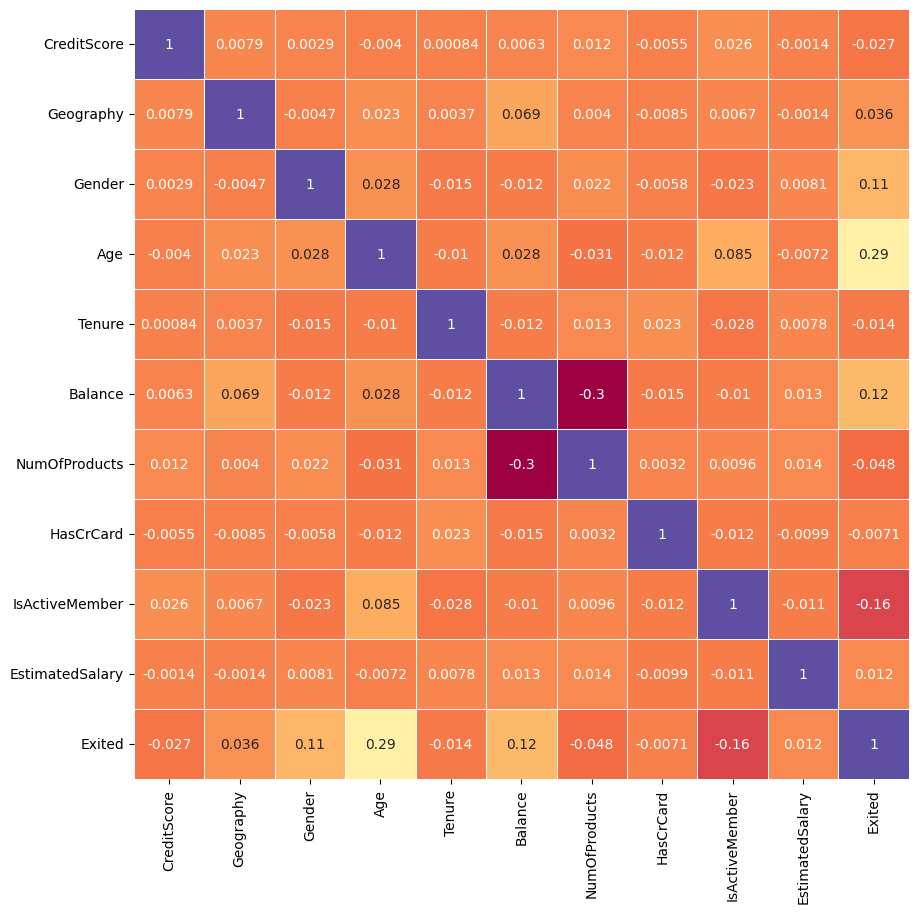

In [16]:
bankDataDFImp_heat = bankDataDFImp.copy()
replace_dict = {'France':1, 'Germany': 2, 'Spain': 3,'Female': 1, 'Male':0}
bankDataDFImp_heat.replace(to_replace =replace_dict, inplace=True)
bankDataDFImp_heat.head()

plt.figure(figsize=(10,10))
sns.heatmap(bankDataDFImp_heat.corr(),cbar=False, annot=True, cmap="Spectral", linewidth=.5)
plt.show()

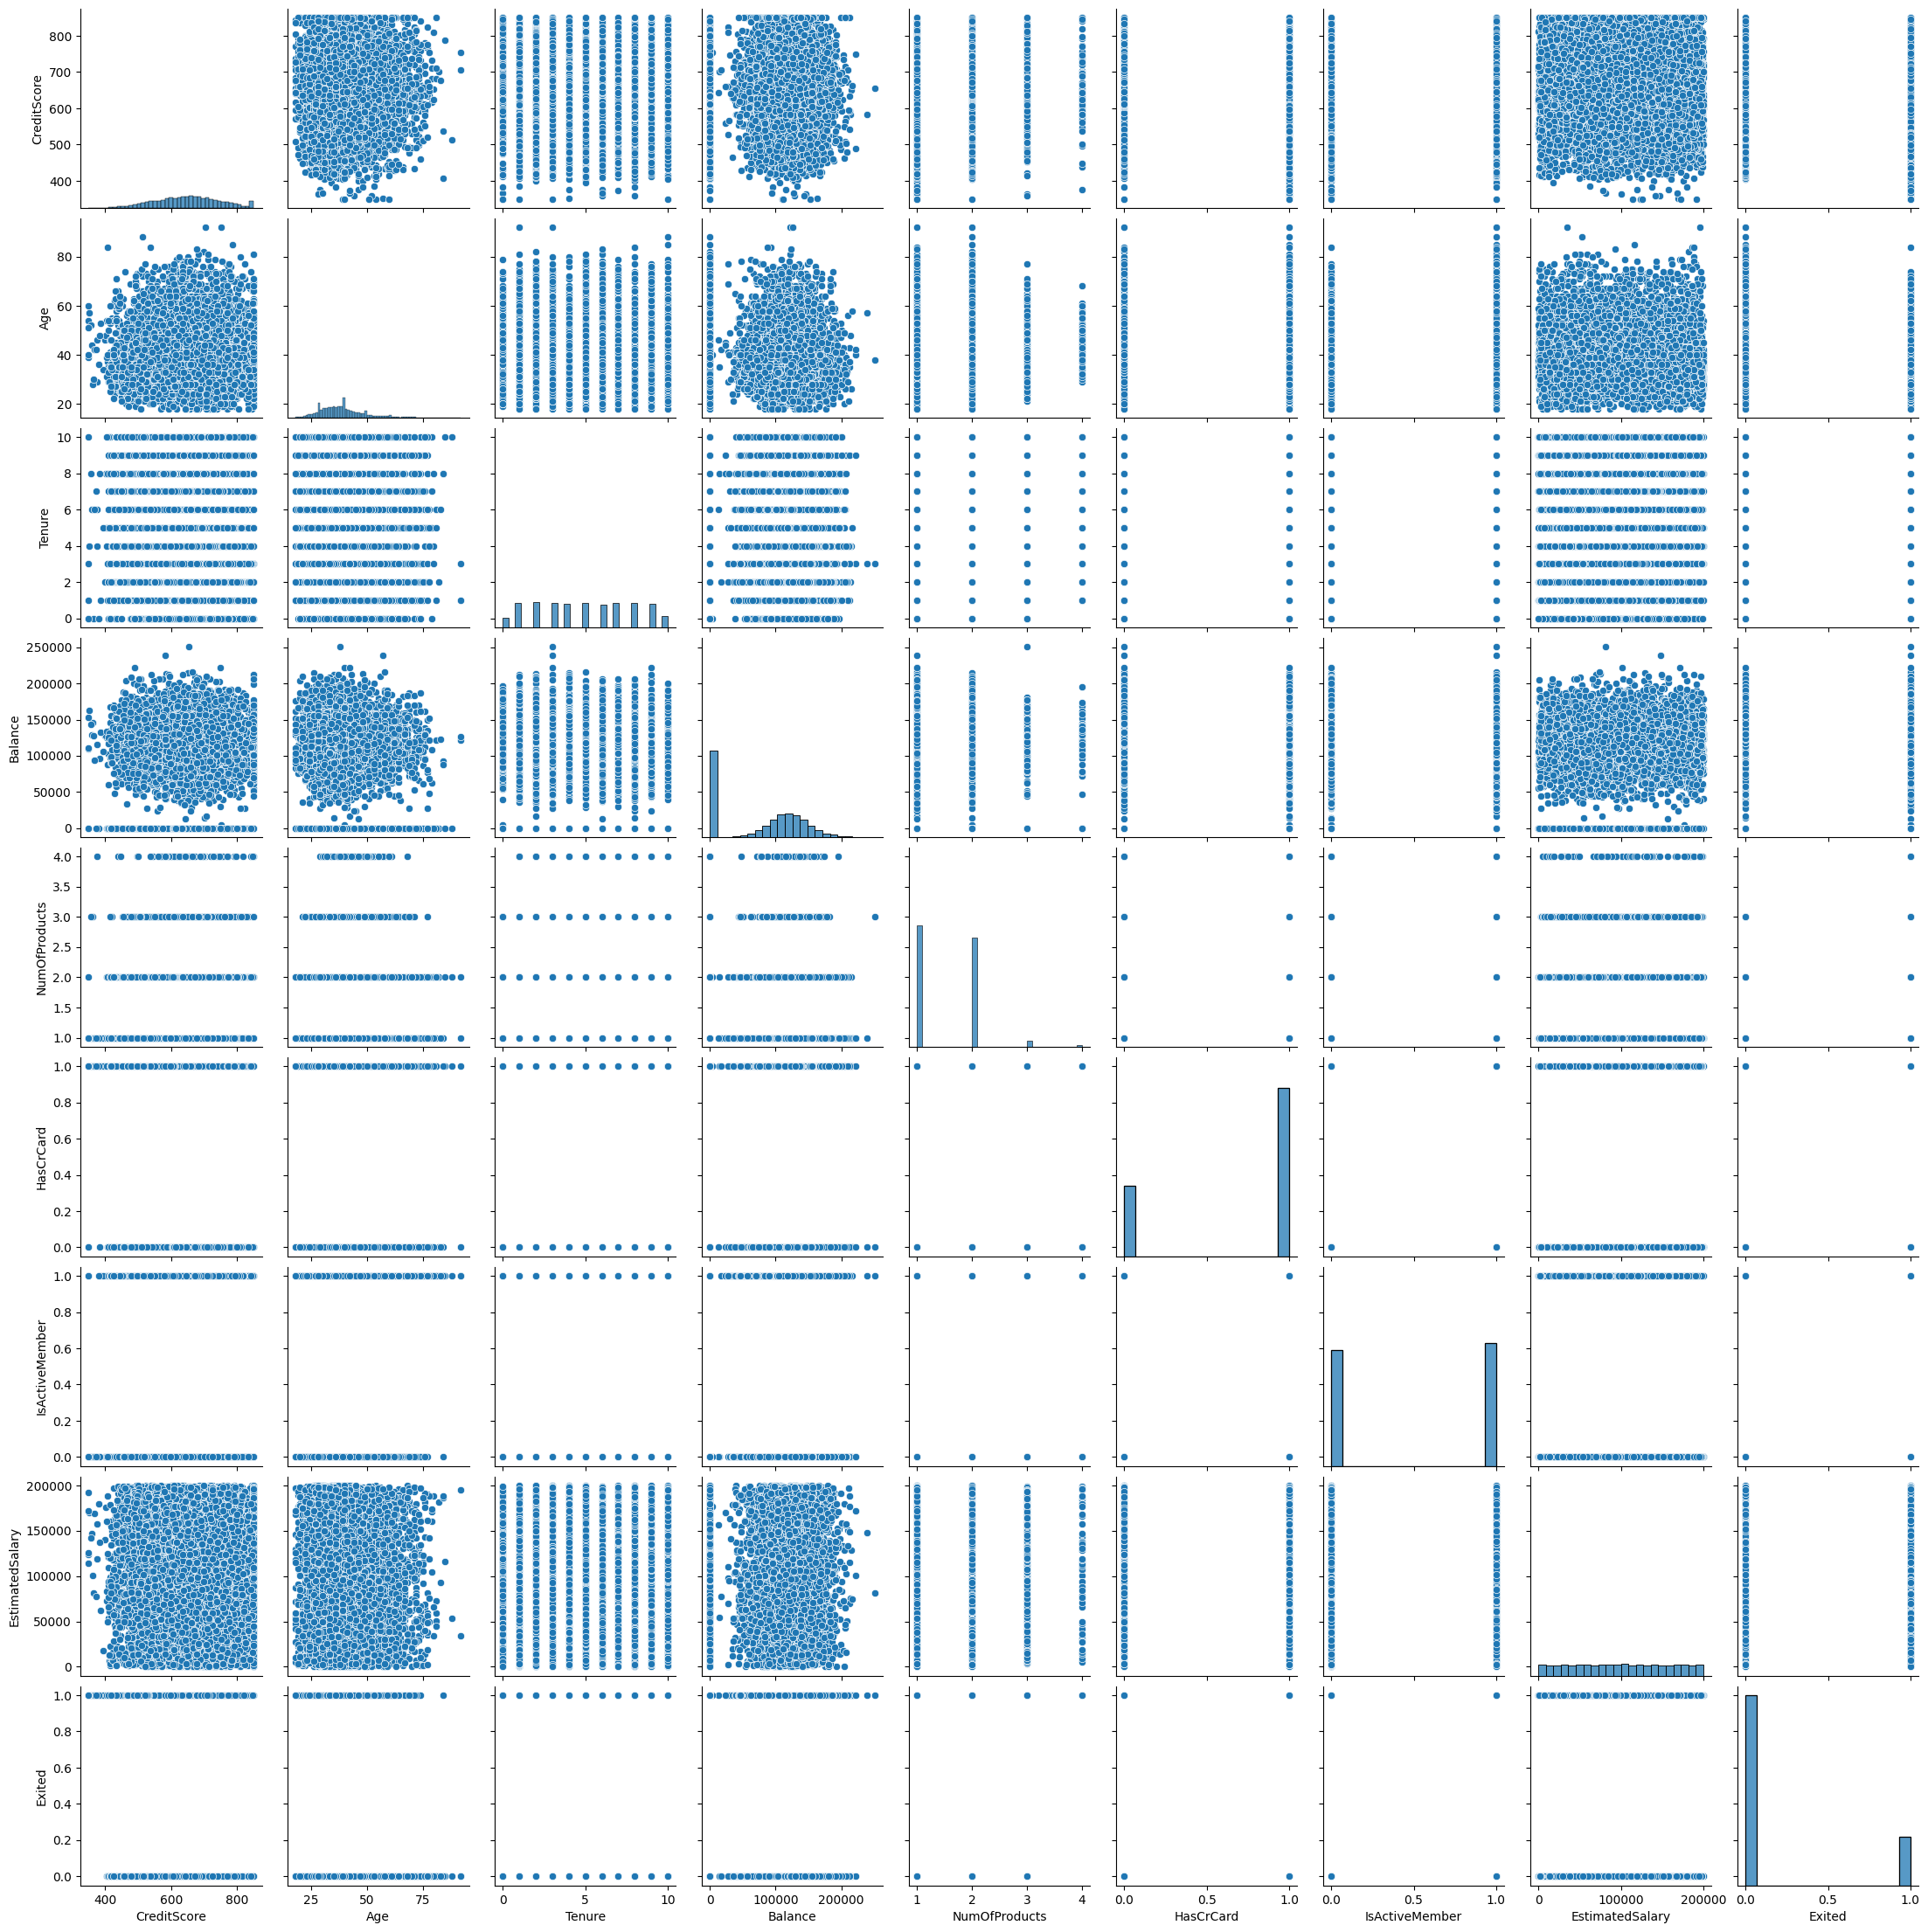

In [17]:
sns.pairplot(data=bankDataDFImp)

#### **Observations**

1. A positive correlation exists between target field 'Exited' and Age, Balance and Gender customer exist features in the dataset.
2. Noticed a negative correlation exists between IsActiveMember and Existed features - meaning inactive members exited the banks

## Data Preprocessing

### Dummy Variable Creation

In [18]:
bankDataDFImpWithDummies=pd.get_dummies(bankDataDFImp,drop_first=True,dtype=float)
bankDataDFImpWithDummies

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1                0.0   
1                  1        112542.58       0                0.0   
2                  0        113931.57       1                0.0   
3                  0         93826.63       0                0.0   
4                  1         79084.10       0                0.0   
...              ...              ...     ...                ...   
9995               0         96270.64       0                0.0   
9996               1        101699.77       0                0.0   
9997               1         42085.58       1                0.0   
9998               0         92888.52       1                1.0   
9999               0         38190.78       0                0.0   

      Geography_Spain  Gender_Male  
0                 0.0          0.0  
1                 1.0          0.0  
2                 0.0          0.0  
3                 0.0          0.0  
4                 1.0          0.0  
...               ...          ...  
9995              0.0          1.0  
9996              0.0          1.0  
9997              0.0          0.0  
9998              0.0          1.0  
9999              0.0          0.0  

[10000 rows x 12 columns]

### Train-validation-test Split

In [19]:
X=bankDataDFImpWithDummies.drop('Exited',axis=1)
Y=bankDataDFImpWithDummies['Exited']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,random_state=1,stratify=Y)
X_train, X_val, y_train, y_val =  train_test_split(X_train,y_train,train_size=0.7,random_state=1,stratify=y_train)
print('Number of records in Training.  :', X_train.shape[0])
print('Number of records in Validation :', X_val.shape[0])
print('Number of records in Testing.   :', X_test.shape[0])

Number of records in Training.  : 5600
Number of records in Validation : 2400
Number of records in Testing.   : 2000


### Data Normalization

In [21]:
# Scaling the numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance', 'EstimatedSalary']])

X_train[['CreditScore','Age','Tenure','Balance', 'EstimatedSalary']] = scaler.transform(X_train[['CreditScore','Age','Tenure','Balance', 'EstimatedSalary']])
X_val[['CreditScore','Age','Tenure','Balance', 'EstimatedSalary']] = scaler.transform(X_val[['CreditScore','Age','Tenure','Balance', 'EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance', 'EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance', 'EstimatedSalary']])

print ('First five rows of training \n\n', X_train.head(5))


First five rows of training 

       CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
6202     0.399937  0.944916  1.038097  0.659632              1          0   
3254    -1.026235  1.039890 -0.337435  0.732420              1          1   
9270    -1.573967 -1.714336 -0.681319  1.617099              1          1   
6242     0.482614  1.229836  1.038097  0.342417              1          1   
601      1.144027 -1.239469  0.694214  0.772931              2          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
6202               1        -0.863385                0.0              1.0   
3254               0         0.288961                1.0              0.0   
9270               1         0.920040                0.0              0.0   
6242               1         0.910569                1.0              0.0   
601                1         1.192718                0.0              1.0   

      Gender_Male  
6202          1.0  
325

## Model Building

### Model Evaluation Criterion

The problem statement at hand requires to build a model that will predict the customer churn.

There are four possible scenarios,

1. Model predicts 'No Churn' and it matches correctly, this is **True Negtiv**e.
2. Model predicts customer will leave and it matches correctly, this is **True Positive.**
3. Model incorrectly predicts a customer as "No Churn" when he/she actually churns, this is the case of a **False Negative**. This leads to financial loss generated from the customers . Also, acquiring a New Customer acquisition is a challenge to any company and  convincing a churned customer to return is much more expensive, so it is very important to identify this category correctly.
4. Model incorrectly predicts a customer as "Churn" but he/she actually stays with the bank,  this is the case of a **False Positive**. The financial spend to keep the customer with the bank is a proactiveness from bank to keep the customer with the bank.

In this case it is very important to **reduce False Negatives errors**. The metric that will help in this case is **Recall**. High Recall number means that the model is performing well and will help identify the potential candidates who would churn

In [22]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum, dropout","weight initializer","regularization","train loss","validation loss","train recall","validation recall","time (secs)", "model","history"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)
i=0

In [23]:
# Define eoch and batch size.

epochsize = 100
batchsize = 16

###Common methods used:

In [24]:
def model_fit(activationitem_l1,activationitem_l2,optimizer_val, Xtrain_data,Ytrain_data,epochsize,i,dropoutval=0,learning_rte=1e-3,momentumval=0.0):

    history =[]


     # to clear the previous sessions
    backend.clear_session()

    # Fixing the seed for random number generators
    np.random.seed(42)
    import random
    random.seed(42)
    tf.random.set_seed(42)

    # We will be adding the layers sequentially

    model_1 = Sequential()
    model_1.add(Dense(128, activation=activationitem_l1, kernel_initializer='he_uniform', input_dim=Xtrain_data.shape[1])) # First hidden layer with 64 neurons, the input shape tuple denotes number of independent variables
    model_1.add(Dense(128, activation=activationitem_l2, kernel_initializer='he_uniform'))                     # Second hidden layer with 32 neurons
    model_1.add(BatchNormalization())
    model_1.add(Dense(64, activation=activationitem_l2, kernel_initializer='he_uniform'))                     # First hidden layer with 64 neurons, the input shape tuple denotes number of independent variables
    model_1.add(BatchNormalization())
    model_1.add(Dense(1, activation='sigmoid'))                                                               # Output layer with only one neuron and sigmoid as activation function will give the probability of people exiting bank

    if optimizer_val =='Adam':
      model_1.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rte), metrics=[tf.keras.metrics.Recall()])
    elif optimizer_val =='AdaGrad':
      model_1.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adagrad(learning_rate=learning_rte), metrics=[tf.keras.metrics.Recall()])
    elif optimizer_val =='SGD':
      model_1.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rte), metrics=[tf.keras.metrics.Recall()])
    elif optimizer_val =='RMS':
        model_1.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rte,momentum=momentumval), metrics=[tf.keras.metrics.Recall()])
    elif optimizer_val =='SGD-Mom':
      model_1.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rte, momentum=momentumval), metrics=[tf.keras.metrics.Recall()])


    model_1.summary()

    start = time.time()
    history = model_1.fit(Xtrain_data,
                      Ytrain_data,
                      #validation_split=0.1,
                      validation_data=(X_val,y_val),
                      epochs=epochsize,
                      batch_size=batchsize,
                      verbose=2)
    end=time.time()

    results.loc[i] = [2,[128,128,64],[activationitem_l1,activationitem_l2],
                      epochsize,batchsize,optimizer_val,[learning_rte, momentumval ,dropoutval],"he_uniform","-",
                      history.history["loss"][-1],
                      history.history["val_loss"][-1],
                      history.history["recall"][-1],
                      history.history["val_recall"][-1],
                      round(end-start,2),
                      model_1, history]

In [25]:
def model_fit_with_dropout(activationitem_l1,activationitem_l2,optimizer_val,Xtrain_data,Ytrain_data,epochsize,i,dropoutval=0,learning_rte=1e-3,momentumval=0.0):

    history =[]


    # to clear the previous sessions
    backend.clear_session()


    # Fixing the seed for random number generators
    np.random.seed(42)
    import random
    random.seed(42)
    tf.random.set_seed(42)

    # We will be adding the layers sequentially

    model_2 = Sequential()
    model_2.add(Dense(128, activation=activationitem_l1, input_dim=Xtrain_data.shape[1],kernel_initializer='he_uniform')) # First hidden layer with 64 neurons the input shape tuple denotes number of independent variables
    model_2.add(Dropout(dropoutval))                                                                        # defining dropout value for the layer
    model_2.add(Dense(128, activation=activationitem_l2,kernel_initializer='he_uniform'))                    # Second hidden layer with 32 neurons
    model_2.add(BatchNormalization())
    model_2.add(Dropout(dropoutval))                                                                        # defining dropout value for the layer
    model_2.add(Dense(64, activation=activationitem_l2,kernel_initializer='he_uniform'))                    # Second hidden layer with 32 neurons
    model_2.add(BatchNormalization())
    model_2.add(Dropout(dropoutval))                                                                        # defining dropout value for the layer
    model_2.add(Dense(1, activation='sigmoid'))                                                             # Output layer with only one neuron and sigmoid as activation function will give the probability of people exiting bank

    if optimizer_val =='Adam':
      model_2.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rte), metrics=[tf.keras.metrics.Recall()])
    elif optimizer_val =='AdaGrad':
      model_2.compile(loss = 'binary_crossentropy', optimizer= tf.keras.optimizers.Adagrad(learning_rate=learning_rte), metrics=[tf.keras.metrics.Recall()])
    elif optimizer_val =='SGD':
        model_2.compile(loss = 'binary_crossentropy', optimizer= tf.keras.optimizers.SGD(learning_rate=learning_rte), metrics=[tf.keras.metrics.Recall()])
    elif optimizer_val =='RMS':
        model_2.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rte,momentum=momentumval), metrics=[tf.keras.metrics.Recall()])
    elif optimizer_val =='SGD-Mom':
        model_2.compile(loss = 'binary_crossentropy', optimizer= tf.keras.optimizers.SGD(learning_rate=learning_rte, momentum=momentumval), metrics=[tf.keras.metrics.Recall()])

    model_2.summary()

    start = time.time()
    history = model_2.fit(Xtrain_data,
                      Ytrain_data,
                      #validation_split=0.1,
                      validation_data=(X_val,y_val),
                      epochs=epochsize,
                      batch_size=batchsize,
                      verbose=2)
    end=time.time()

    results.loc[i] = [2,[128,128,64],[activationitem_l1,activationitem_l2],
                  epochsize,batchsize,optimizer_val,[learning_rte, momentumval ,dropoutval],"he_uniform","-",
                  history.history["loss"][-1],
                  history.history["val_loss"][-1],
                  history.history["recall"][-1],
                  history.history["val_recall"][-1],
                  round(end-start,2),
                  model_2,
                  history]


In [26]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

### Neural Network with AdaGrad

In [27]:
model_fit('relu','relu','AdaGrad',X_train,y_train,100,i)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 6

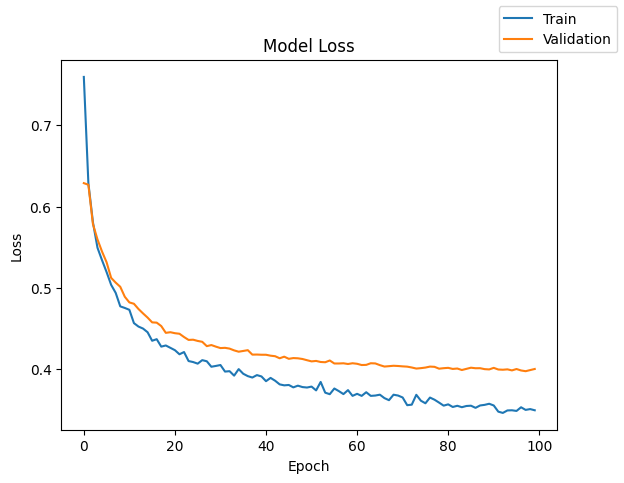

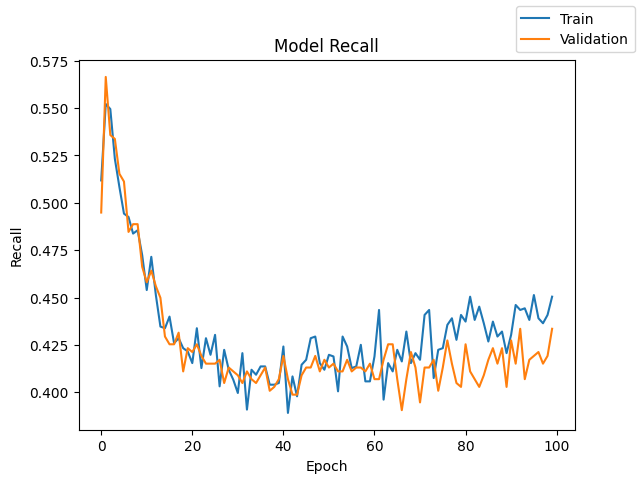

In [28]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [29]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                        AdaGrad
learning rate, momentum, dropout                                         [0.001, 0.0, 0]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                       0.34906
validation loss                                                                  0.39992
train recall         

#### **Observation**

1. Plot betwen loss and epoch shows that the model learns well over the period of training. Validation follows the Training curve closely for the learning rate of 0.001.
2. The Training and Validation Recall scores are really poor, making it unsuitable for usage.

### Neural Network with SGD Optimizer

In [30]:
i+=1
model_fit('relu','relu','SGD',X_train,y_train,100,i)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 6

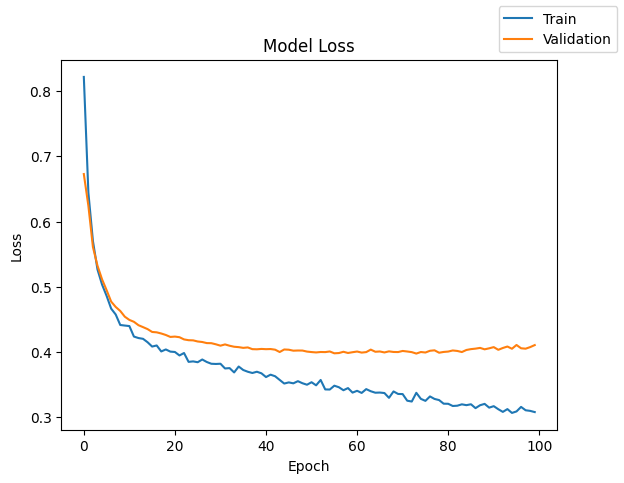

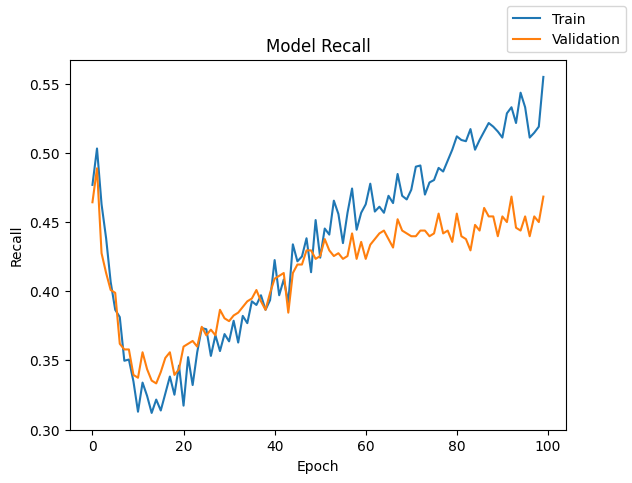

In [31]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [32]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                            SGD
learning rate, momentum, dropout                                         [0.001, 0.0, 0]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.307272
validation loss                                                                 0.410196
train recall         

#### **Observations**

*   Plot betwwen loss and epoch shows that the model learns well over the period of training. Hence the graph for training and validation loss converges smoothly.
*   Recall scores of the validation data keeps moving up and down and is not smoothly following the training data.
*   The scores of SGD is better than AdaGrad but still low, making it unsuitable for usage


### Neural Network with SGD Optimizer with Momentum

In [33]:
i+=1
model_fit('relu','relu','SGD-Mom',X_train,y_train,100,i,momentumval=0.5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 6

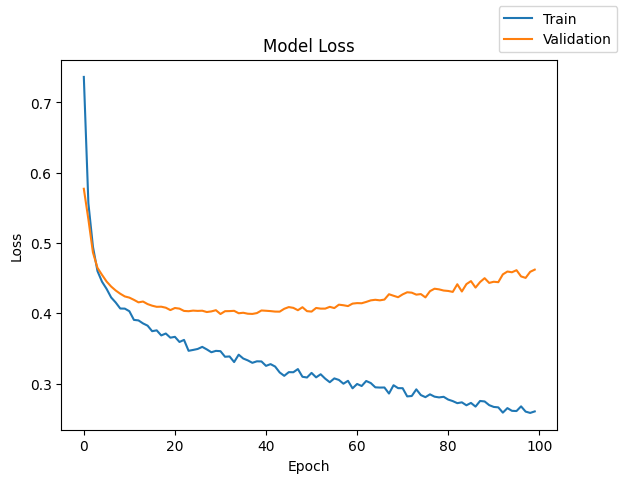

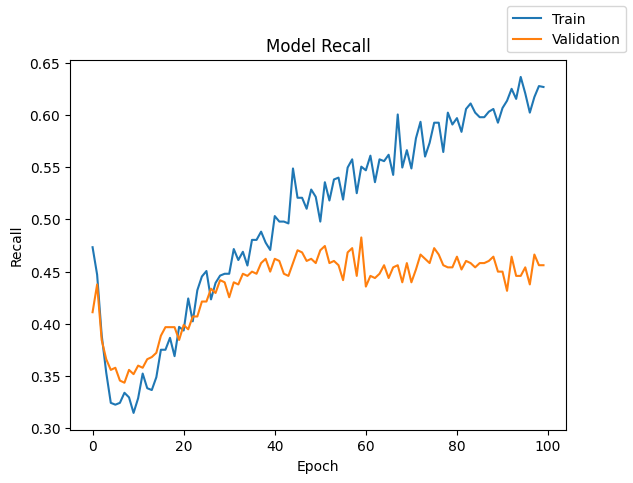

In [34]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [35]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                        SGD-Mom
learning rate, momentum, dropout                                         [0.001, 0.5, 0]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.260472
validation loss                                                                 0.462195
train recall         

#### **Observation**

*  Adding a momentum is set at 0.5 to the SGD optimizer expecting to minimize loss, expected a better convergence of training and validation data but there is no convergence.
*  The loss has reduced when compared to SGD optimizer and noticing a slight increase in the recall scores, but still scores are low.

### Neural Network with RMSprop

In [36]:
i+=1
model_fit('relu','relu','RMS',X_train,y_train,100,i,learning_rte=1e-4,momentumval=0.75)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 6

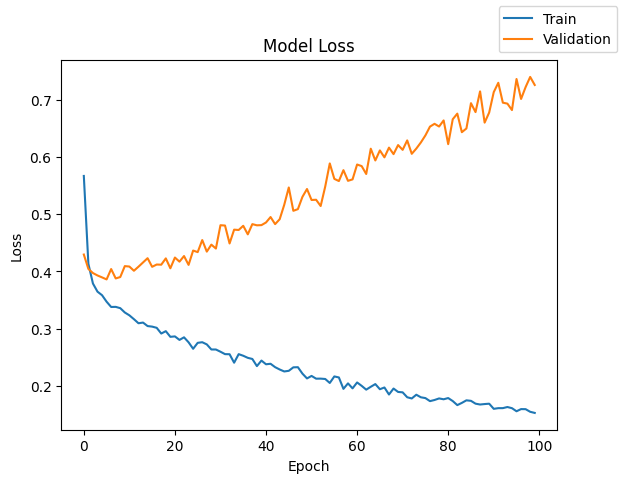

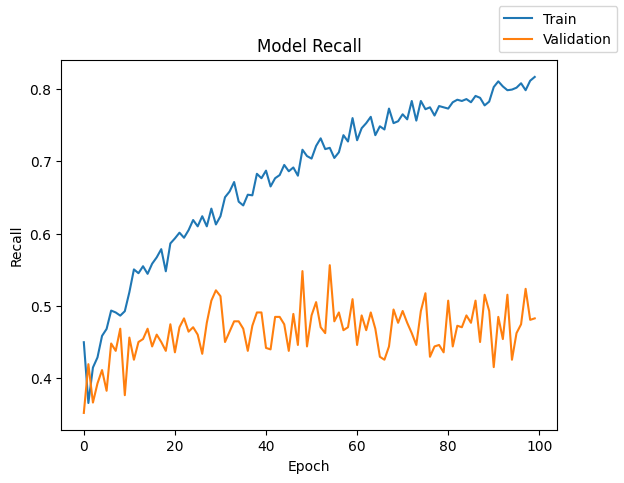

In [37]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [38]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                            RMS
learning rate, momentum, dropout                                       [0.0001, 0.75, 0]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.153165
validation loss                                                                 0.725464
train recall         

####**Observations**:

1. Used RMSProp as optimizer and provided a 0.75 as momentum to explore the changes to loss gradient. The loss reduced in training period.
2. Recall score for Training data is more but the fact the validation recall is only 0.48, gives an opinion there is some overfit of data during training. So not a suitable mode for the data provided



### Neural Network with Adam Optimizer

In [39]:
i+=1
model_fit('relu','relu','Adam',X_train,y_train,100,i,learning_rte=1e-4)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 6

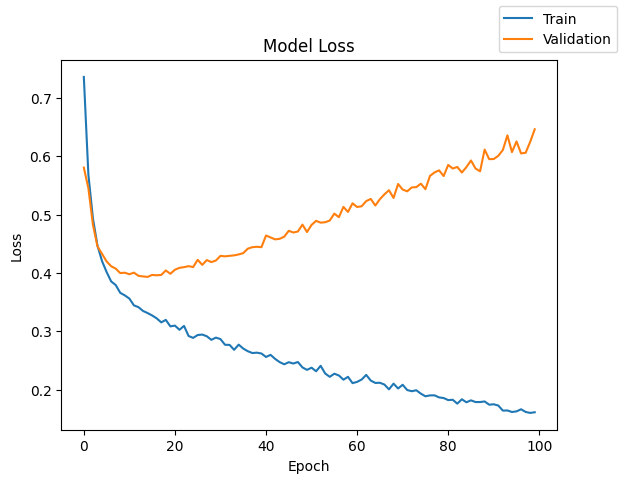

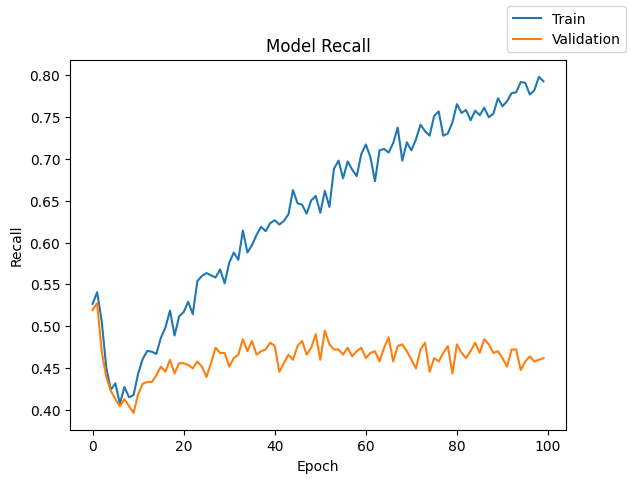

In [40]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [41]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                           Adam
learning rate, momentum, dropout                                        [0.0001, 0.0, 0]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.161517
validation loss                                                                  0.64609
train recall         

#### **Observations**

Changed the optimizer to Adam with a learning rate of 0.0001, expected the model to converge smoothly for both Training and  validation.
Even though the loss gradually reduced for training data the model showed very less improvemenent with validation data. Hence not suitable for the purpose.

## Model Performance Improvement

### Neural Network with Adam Optimizer and Dropout

Implementing two Dropouts ratios (0.2 and 0.3) in the model, for performance improvements.

In [42]:
i+=1
model_fit_with_dropout('relu','relu','Adam',X_train,y_train,100,i,dropoutval=0.2,learning_rte=1e-4) # dropout value is set at 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                        

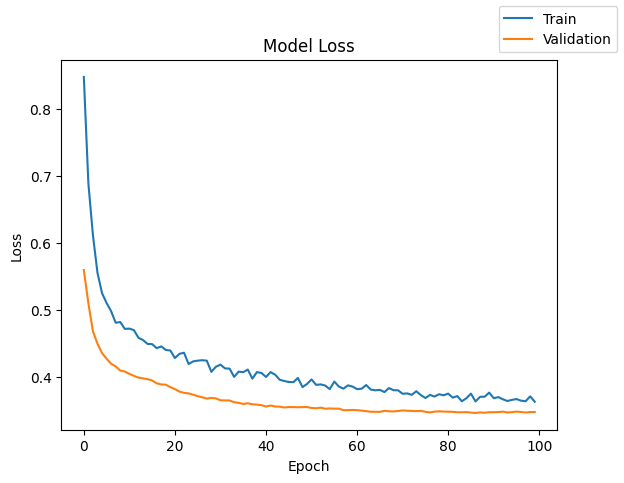

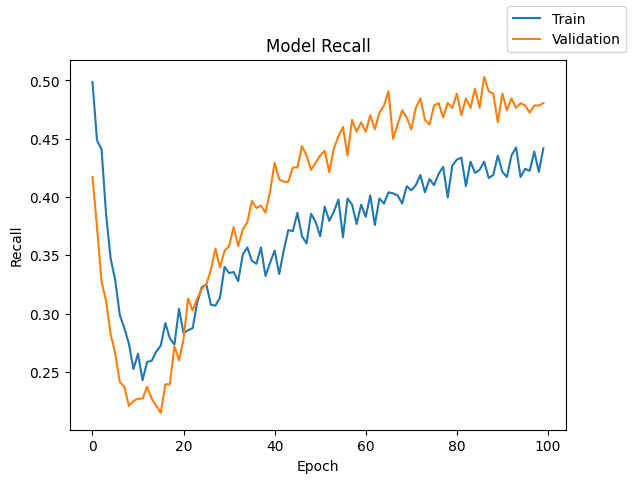

In [43]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [44]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                           Adam
learning rate, momentum, dropout                                      [0.0001, 0.0, 0.2]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.362576
validation loss                                                                 0.347113
train recall         

In [45]:
i+=1
model_fit_with_dropout('relu','relu','Adam',X_train,y_train,100,i,dropoutval=0.3,learning_rte=1e-4) # dropout value increased to 0.3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                        

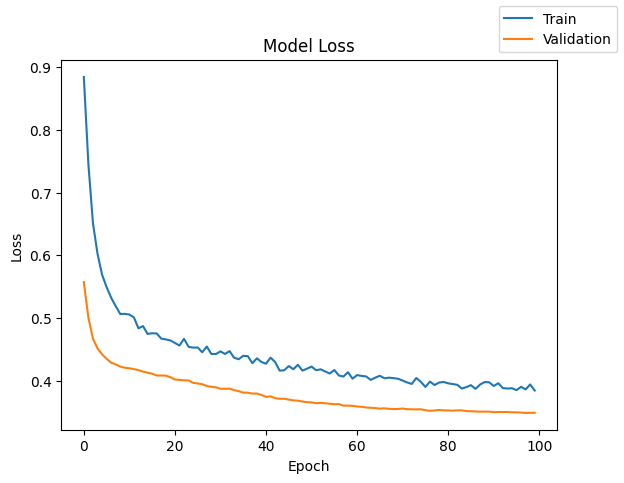

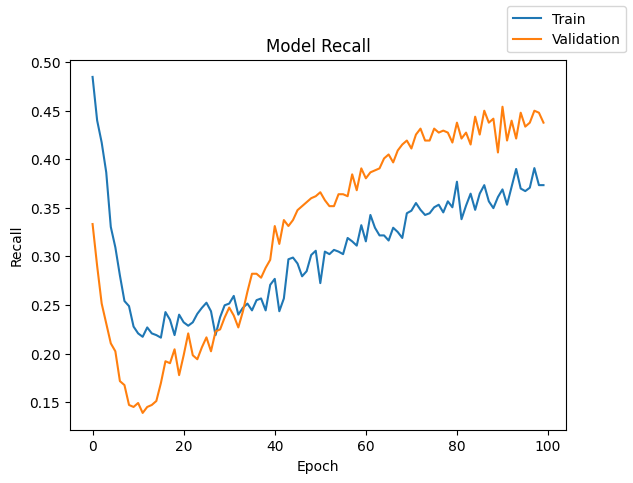

In [46]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [47]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                           Adam
learning rate, momentum, dropout                                      [0.0001, 0.0, 0.3]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.384523
validation loss                                                                 0.349065
train recall         

#### **Observation**

Neural Network with dropout ratio of 0.2 was performing better than the Neural Network with dropout ration 0.3. Still the Recall scores didnt improve significantly. Next step is to implement Oversampling technique SMOTE to see scores improvements

### SMOTE - Oversampling Data

In [48]:
# To oversample the data
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [49]:
i+=1
model_fit('relu','relu','SGD',X_train_over,y_train_over,100,i)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 6

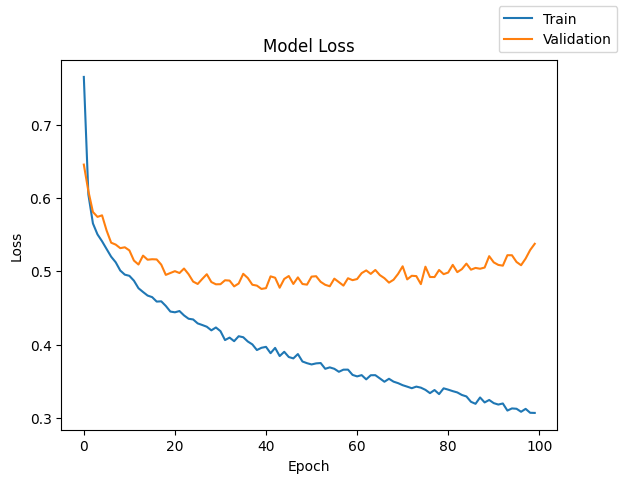

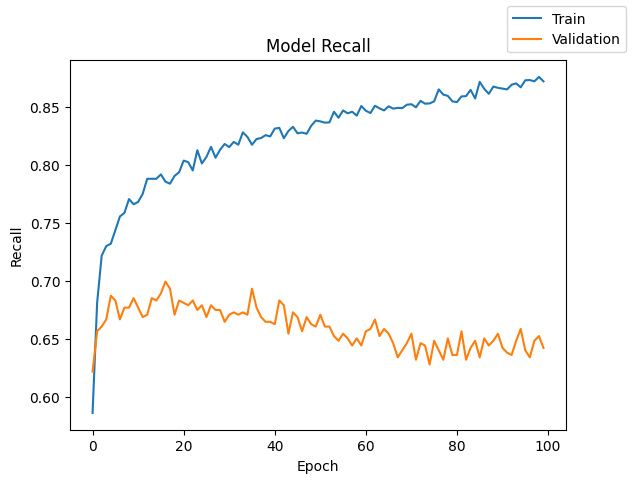

In [50]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [51]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                            SGD
learning rate, momentum, dropout                                         [0.001, 0.0, 0]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                       0.30725
validation loss                                                                 0.537618
train recall         

#### **Observation**

* Trained Neural network is behaving very differently for the validation data, the loss shows a different path and not following the path created by Training data.

* train recall                                                                    0.872169
& validation recall                                                               0.642127

* The recall score for training data is very high where as the validation scores are less showing a lot of difference. This potentially means the model overfit the data. So not a good model.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer with Momentum

In [52]:
i+=1
model_fit('relu','relu','SGD-Mom',X_train_over,y_train_over,100,i,learning_rte=1e-5,momentumval=0.9)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 6

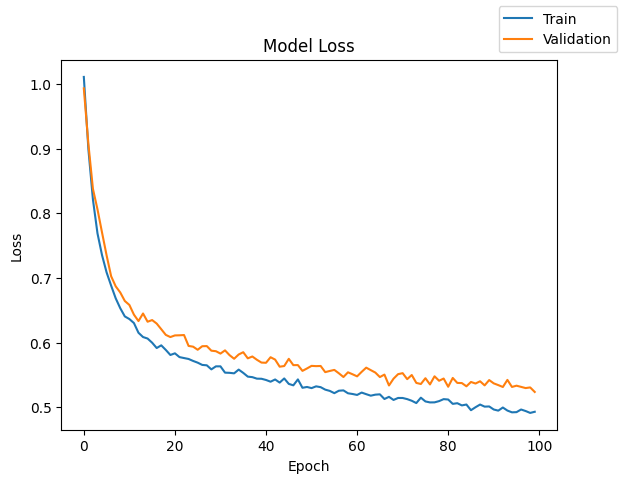

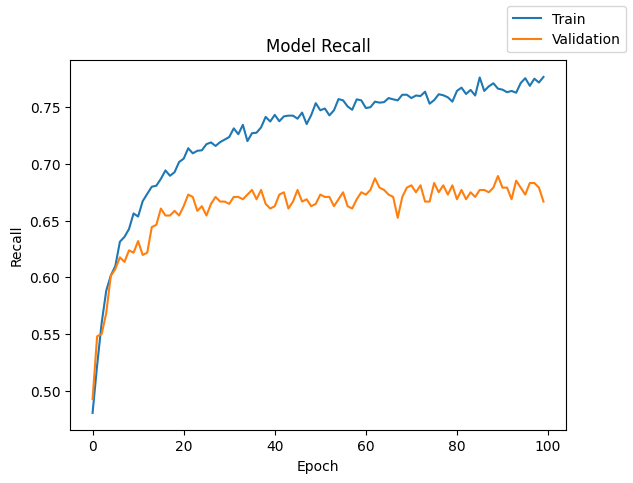

In [53]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [54]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                        SGD-Mom
learning rate, momentum, dropout                                         [1e-05, 0.9, 0]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.492929
validation loss                                                                 0.523605
train recall         

#### **Observation**

* SGD Optimizer with Momentum shows a good convergence in the loss gradience, Network built responded the same way for both Training and Validation data.

* train recall                                                                    0.776407 &
validation recall                                                               0.666667

* Recall score of the Neural Network is good for training but less for validation data.

### Neural Network with Balanced Data (by applying SMOTE) and RMSProp

In [55]:
i+=1
model_fit('relu','relu','RMS',X_train_over,y_train_over,100,i,learning_rte=1e-5,momentumval=0.9)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 6

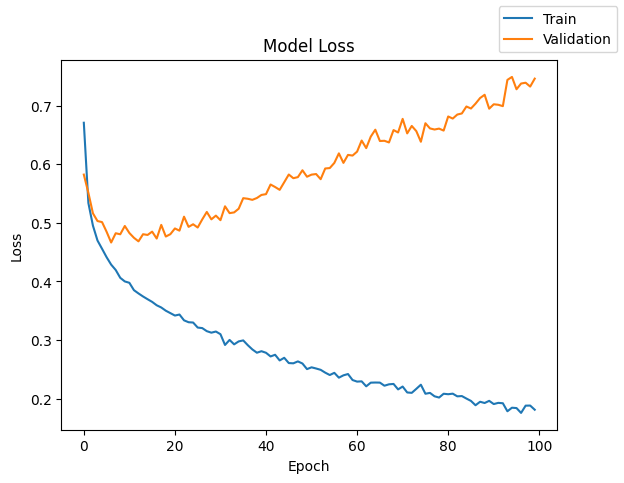

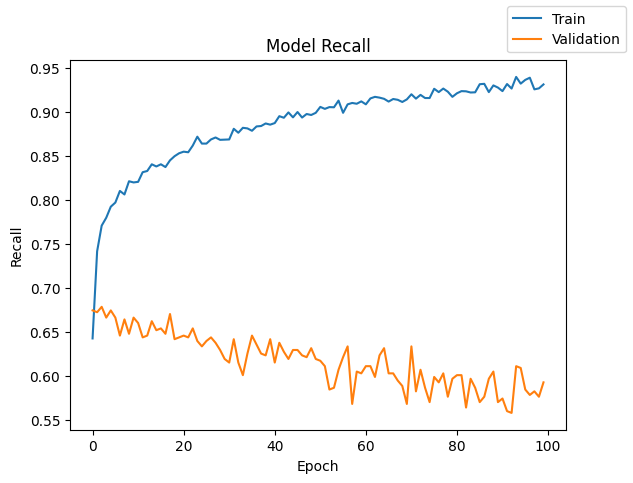

In [56]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [57]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                            RMS
learning rate, momentum, dropout                                         [1e-05, 0.9, 0]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.181092
validation loss                                                                 0.746226
train recall         

#### **Observation**

* Trained Neural network is behaving very differently for the validation data, the loss shows a different path and not following the path created by Training data.

* train recall                                                                    0.931823 &
validation recall                                                               0.593047

* The recall score for training data is very high where as the validation scores are less showing a lot of difference. This potentially means the model overfit the data. So not a good model.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [58]:
i+=1
model_fit('relu','relu','Adam',X_train_over,y_train_over,100,i,learning_rte=1e-5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 6

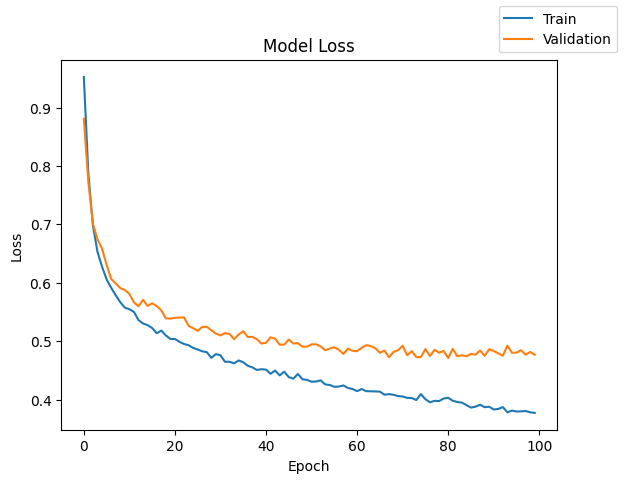

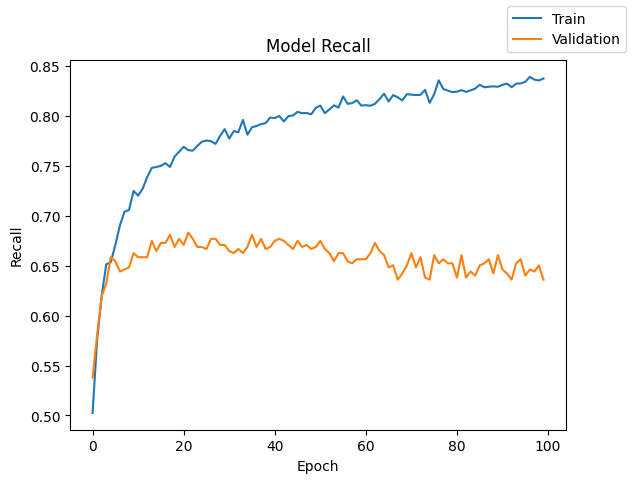

In [59]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [60]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                           Adam
learning rate, momentum, dropout                                         [1e-05, 0.0, 0]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.377406
validation loss                                                                 0.477113
train recall         

####**Observation**

* Neural network with the Adam optimizer shows a good convergence in the loss gradience, Network built responded the same way for both Training and Validation data.

* train recall      :0.837407 &
validation recall : 0.635992

* Recall score of training data from the Neural Network is good but slightly less for validation data. The difference is not optimal value, hence not the best model.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [61]:
i+=1
model_fit_with_dropout('relu','relu','Adam',X_train_over,y_train_over,100,i,dropoutval=0.2,learning_rte=1e-5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                        

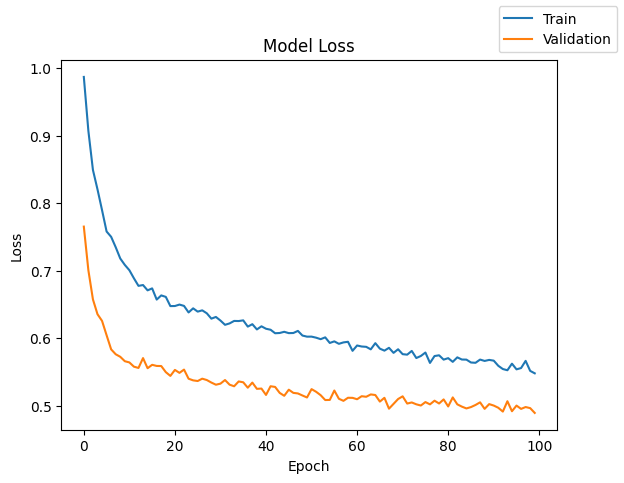

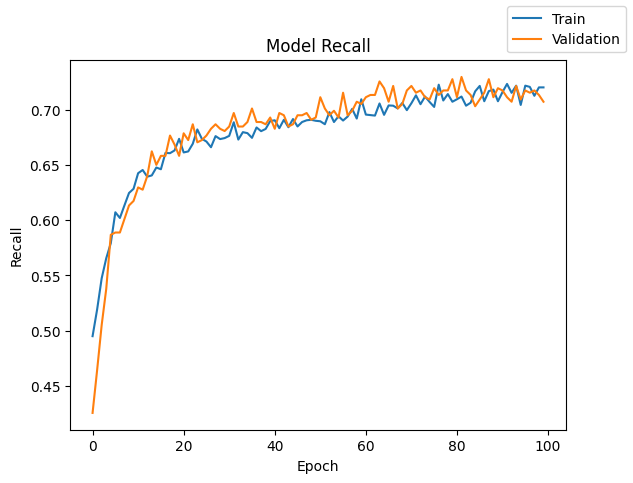

In [62]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [63]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                           Adam
learning rate, momentum, dropout                                       [1e-05, 0.0, 0.2]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.548106
validation loss                                                                 0.489455
train recall         

#### **Observation**

* The Neural Network build using ADAM with dropout of 20% was the best fit as the loss was less and the recall scores generated for training anf validation data  are close to one another.  

* train recall                                                                    0.720565 &
validation recall                                                               0.707566

* This one has the best recall scores and is the best one out of all models

In [64]:
i+=1
model_fit_with_dropout('relu','relu','Adam',X_train_over,y_train_over,100,i,dropoutval=0.3,learning_rte=1e-5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                        

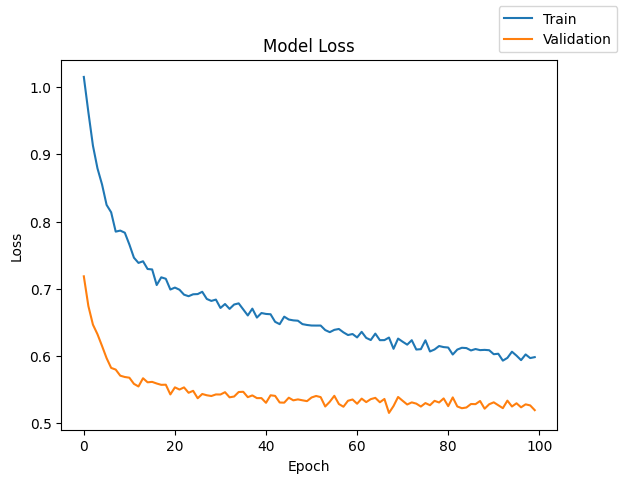

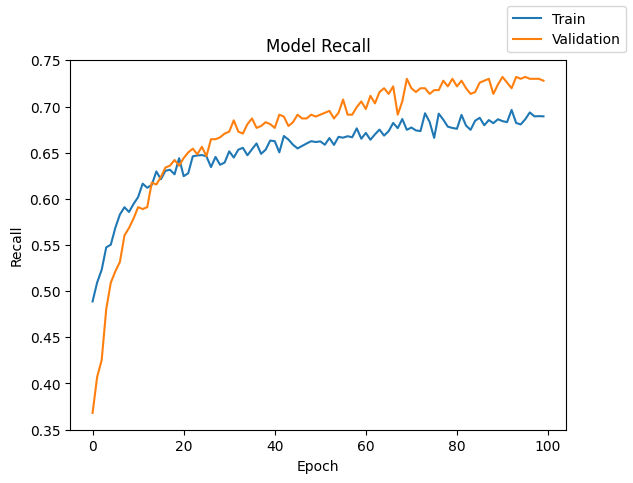

In [65]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [66]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                           Adam
learning rate, momentum, dropout                                       [1e-05, 0.0, 0.3]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.598142
validation loss                                                                 0.519198
train recall         

#### **Observation**

* The Neural Network build using ADAM with dropout of 30% has recall score as mentioned below

* train recall                                                                    0.689392 &
validation recall                                                               0.728016

* The loss is reduced with training and the loss for training data and validation data are following the same path.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer and dropout

In [67]:
i+=1
model_fit_with_dropout('relu','relu','SGD-Mom',X_train_over,y_train_over,100,i,dropoutval=0.2,learning_rte=1e-5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                        

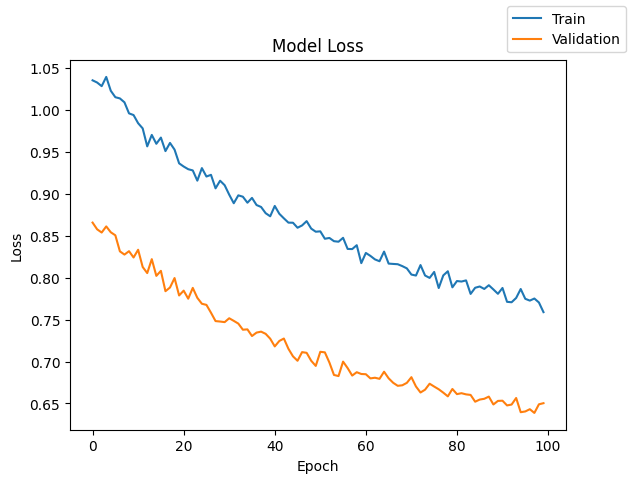

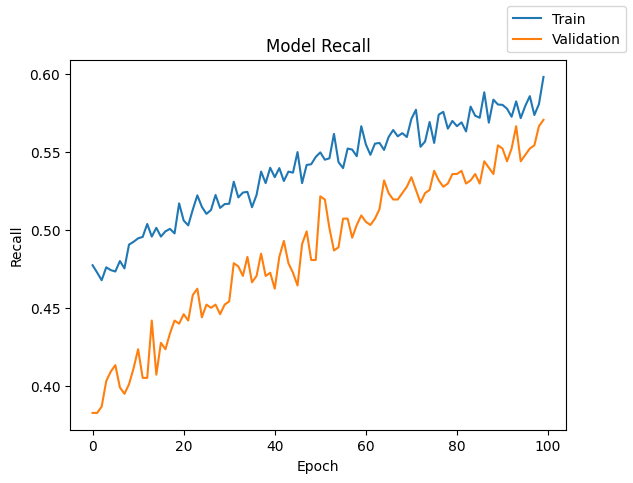

In [68]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [69]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                        SGD-Mom
learning rate, momentum, dropout                                       [1e-05, 0.0, 0.2]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.758918
validation loss                                                                 0.650358
train recall         

#### **Observation**

* Neural Network built using SGD and 20% dropout ratio is not learing well to reduce the loss graidence. the value stands very high at 0.75 for training data.

* train recall                                                                    0.598116 &
validation recall                                                               0.570552

* Recall scores from the model is also very less, making it unsuitable

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer with momentum and dropout

In [76]:
i+=1
model_fit_with_dropout('relu','relu','SGD-Mom',X_train_over,y_train_over,100,i,dropoutval=0.2,learning_rte=1e-5, momentumval=0.9)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                        

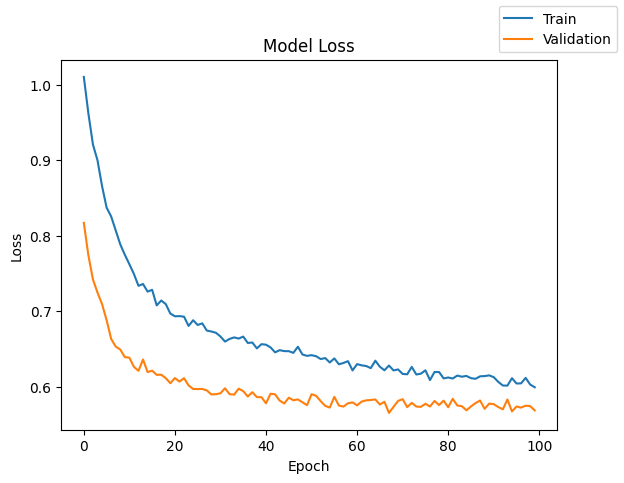

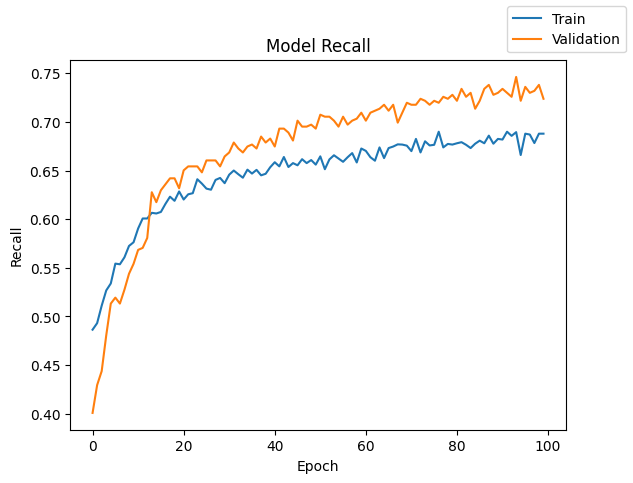

In [77]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [78]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                        SGD-Mom
learning rate, momentum, dropout                                       [1e-05, 0.9, 0.2]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                       0.59902
validation loss                                                                 0.568359
train recall         

#### **Observation**

* Neural Network built using SGD with moment and 20% dropout ratio shows a good reduction in the loss gradience  showing that it is learning.  

* train recall                                                                    0.688047 &
validation recall                                                               0.723926

* Recall scores from the model is descent, so we can try this model for the test data.

In [79]:
i+=1
model_fit_with_dropout('relu','relu','SGD-Mom',X_train_over,y_train_over,100,i,dropoutval=0.3,learning_rte=1e-5, momentumval=0.75)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                        

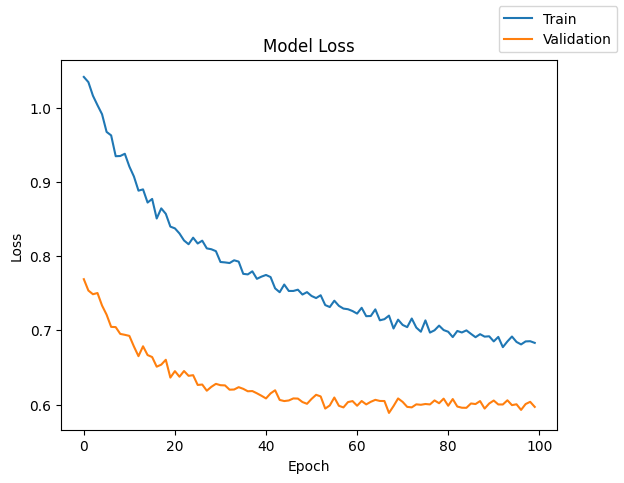

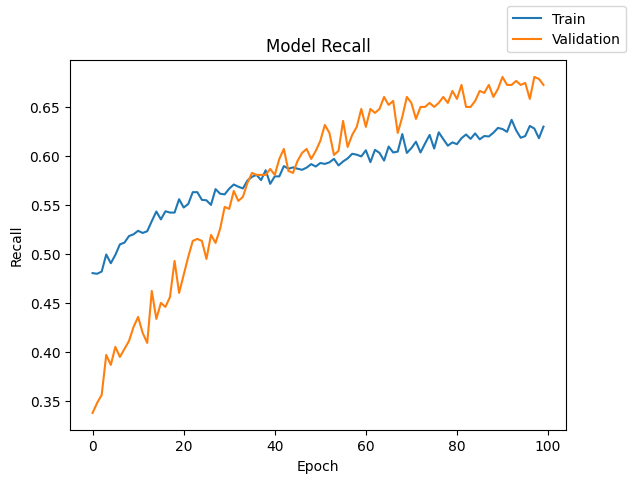

In [80]:
plot(results.iloc[i]['history'],'loss')
plot(results.iloc[i]['history'],'recall')

In [81]:
results.iloc[i]

# hidden layers                                                                        2
# neurons - hidden layer                                                  [128, 128, 64]
activation function - hidden layer                                          [relu, relu]
# epochs                                                                             100
batch size                                                                            16
optimizer                                                                        SGD-Mom
learning rate, momentum, dropout                                      [1e-05, 0.75, 0.3]
weight initializer                                                            he_uniform
regularization                                                                         -
train loss                                                                      0.683199
validation loss                                                                 0.596861
train recall         

### **Observation:**

1. After the data was oversampled the loss redcued with training and validations closely followed one another. Recall scores have also improved significantly.
2. NN performance was better with the oversampled data. Recall scores for all the models have improved significantly.
3. SGD with momentum and Adam with Dropouts (0.2 and 0.3) have provided better results.

Below table summarizes the results from the various scenarios

## Model Performance Comparison and Final Model Selection

### Results

In [82]:
# results.sort_values(by='train recall',axis=0,ascending=False)
results

# hidden layers # neurons - hidden layer  \
0                 2           [128, 128, 64]   
1                 2           [128, 128, 64]   
2                 2           [128, 128, 64]   
3                 2           [128, 128, 64]   
4                 2           [128, 128, 64]   
5                 2           [128, 128, 64]   
6                 2           [128, 128, 64]   
7                 2           [128, 128, 64]   
8                 2           [128, 128, 64]   
9                 2           [128, 128, 64]   
10                2           [128, 128, 64]   
11                2           [128, 128, 64]   
12                2           [128, 128, 64]   
13                2           [128, 128, 64]   
14                2           [128, 128, 64]   
15                2           [128, 128, 64]   
16                2           [128, 128, 64]   
17                2           [128, 128, 64]   

   activation function - hidden layer   # epochs  batch size optimizer  \
0                         [relu, relu]       100          16   AdaGrad   
1                         [relu, relu]       100          16       SGD   
2                         [relu, relu]       100          16   SGD-Mom   
3                         [relu, relu]       100          16       RMS   
4                         [relu, relu]       100          16      Adam   
5                         [relu, relu]       100          16      Adam   
6                         [relu, relu]       100          16      Adam   
7                         [relu, relu]       100          16       SGD   
8                         [relu, relu]       100          16   SGD-Mom   
9                         [relu, relu]       100          16       RMS   
10                        [relu, relu]       100          16      Adam   
11                        [relu, relu]       100          16      Adam   
12                        [relu, relu]       100          16      Adam   
13                        [relu, relu]       100          16   SGD-Mom   
14                        [relu, relu]       100          16   SGD-Mom   
15                        [relu, relu]       100          16   SGD-Mom   
16                        [relu, relu]       100          16   SGD-Mom   
17                        [relu, relu]       100          16   SGD-Mom   

   learning rate, momentum, dropout weight initializer regularization  \
0                   [0.001, 0.0, 0]         he_uniform              -   
1                   [0.001, 0.0, 0]         he_uniform              -   
2                   [0.001, 0.5, 0]         he_uniform              -   
3                 [0.0001, 0.75, 0]         he_uniform              -   
4                  [0.0001, 0.0, 0]         he_uniform              -   
5                [0.0001, 0.0, 0.2]         he_uniform              -   
6                [0.0001, 0.0, 0.3]         he_uniform              -   
7                   [0.001, 0.0, 0]         he_uniform              -   
8                   [1e-05, 0.9, 0]         he_uniform              -   
9                   [1e-05, 0.9, 0]         he_uniform              -   
10                  [1e-05, 0.0, 0]         he_uniform              -   
11                [1e-05, 0.0, 0.2]         he_uniform              -   
12                [1e-05, 0.0, 0.3]         he_uniform              -   
13                [1e-05, 0.0, 0.2]         he_uniform              -   
14                [1e-05, 0.9, 0.2]         he_uniform              -   
15               [1e-05, 0.75, 0.3]         he_uniform              -   
16                [1e-05, 0.9, 0.2]         he_uniform              -   
17               [1e-05, 0.75, 0.3]         he_uniform              -   

    train loss  validation loss  train recall  validation recall  time (secs)  \
0     0.349060         0.399920      0.450482           0.433538       117.99   
1     0.307272         0.410196      0.554776           0.468303       115.66   
2     0.260472         0.462195      0.626643        

In [83]:
print('The recall scores from various models are listed below')


printlist = ['Adagrad', 'SGD', 'SGD with Momentum' ,'RMSProp', 'Adam with no dropout', 'Adam with 0.2 dropout', 'Adam with 0.3 dropout',
             'Smote - SGD', 'Smote - SGD with Momentum','Smote - RMSProp', 'Smote - Adam with no dropout', 'Smote Adam with 0.2 dropout', 'Smote Adam with 0.3 dropout',
             'Smote SGD with 0.2 dropout', 'Smote SGD with Momentum with 0.2 dropout', 'Smote SGD with Momentum with 0.3 dropout']

output =pd.DataFrame (columns=['Model', 'Training Recall Score', 'Validation Recall Score'])

for inc, model in enumerate(printlist):
  output.loc[inc] = [model, results.iloc[inc]['train recall'], results.iloc[inc]['validation recall']]

output


The recall scores from various models are listed below


Model  Training Recall Score  \
0                                    Adagrad               0.450482   
1                                        SGD               0.554776   
2                          SGD with Momentum               0.626643   
3                                    RMSProp               0.816827   
4                       Adam with no dropout               0.792287   
5                      Adam with 0.2 dropout               0.441718   
6                      Adam with 0.3 dropout               0.373357   
7                                Smote - SGD               0.872169   
8                  Smote - SGD with Momentum               0.776407   
9                            Smote - RMSProp               0.931823   
10              Smote - Adam with no dropout               0.837407   
11               Smote Adam with 0.2 dropout               0.720565   
12               Smote Adam with 0.3 dropout               0.689392   
13                Smote SGD with 0.2 dropout               0.598116   
14  Smote SGD with Momentum with 0.2 dropout               0.688047   
15  Smote SGD with Momentum with 0.3 dropout               0.630186   

    Validation Recall Score  
0                  0.433538  
1                  0.468303  
2                  0.456033  
3                  0.482618  
4                  0.462168  
5                  0.480573  
6                  0.437628  
7                  0.642127  
8                  0.666667  
9                  0.593047  
10                 0.635992  
11                 0.707566  
12                 0.728016  
13                 0.570552  
14                 0.723926  
15                 0.672802

####**Observation**##

The Recall scores are better for these models,
  1. Oversampled data with Adam optimizer with a dropput rate 0.2 **- result.iloc[11]**
  2. Oversampled data with Adam optimizer with a dropput rate 0.3 **- result.iloc[12]**
  3. Oversampled data with Smote SGD with Momentum with 0.2 dropout **- result.iloc[14]**


  

In [85]:
#confusion matrix method
def make_confusion_matrix(titlestr,ytrain,predictTrain,labels=[1, 0]):

    cm=metrics.confusion_matrix( ytrain, predictTrain, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (5,4))
    plt.title(titlestr)
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


63/63 [==============================] - 0s 2ms/step
model_1 <keras.src.engine.sequential.Sequential object at 0x7dfcee7a73a0>
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1593
           1       0.44      0.71      0.54       407

    accuracy                           0.76      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.82      0.76      0.78      2000



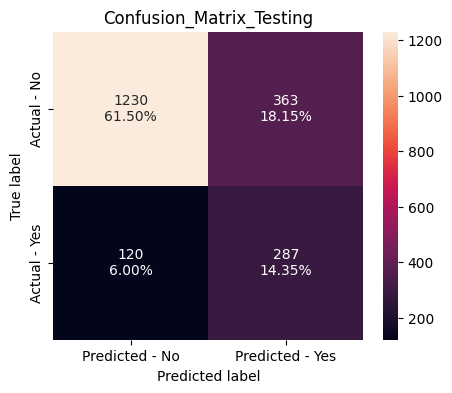

In [91]:
#Oversampled data with Adam optimizer with a dropput rate 0.2

model_1 = results.iloc[11]['model']


# Predicting using the model and Converting the sigmoid output to binary
y1_test_predicted = model_1.predict(X_test)
y1_test_predicted = y1_test_predicted > 0.5
print ('model_1', model_1)

from sklearn import metrics
cr1= metrics.classification_report(y_test,y1_test_predicted)
print(cr1)

make_confusion_matrix('Confusion_Matrix_Testing',y_test, y1_test_predicted)

63/63 [==============================] - 0s 2ms/step
model_2 <keras.src.engine.sequential.Sequential object at 0x7dfcdf1da470>
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1593
           1       0.41      0.68      0.51       407

    accuracy                           0.73      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.73      0.75      2000



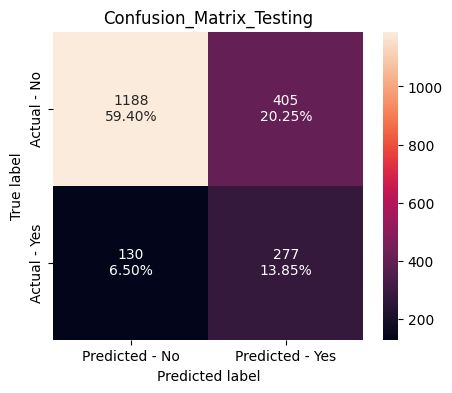

In [90]:
#Oversampled data with Adam optimizer with a dropput rate 0.3
model_2 = results.iloc[12]['model']

# Predicting using the model and Converting the sigmoid output to binary
y2_test_predicted = model_2.predict(X_test)

y2_test_predicted = y2_test_predicted > 0.5
print ('model_2', model_2)

from sklearn import metrics
cr2= metrics.classification_report(y_test,y2_test_predicted)
print(cr2)

make_confusion_matrix('Confusion_Matrix_Testing',y_test, y2_test_predicted)

63/63 [==============================] - 0s 2ms/step
model_3 <keras.src.engine.sequential.Sequential object at 0x7dfcde2c6cb0>
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1593
           1       0.37      0.70      0.48       407

    accuracy                           0.69      2000
   macro avg       0.63      0.70      0.63      2000
weighted avg       0.79      0.69      0.72      2000



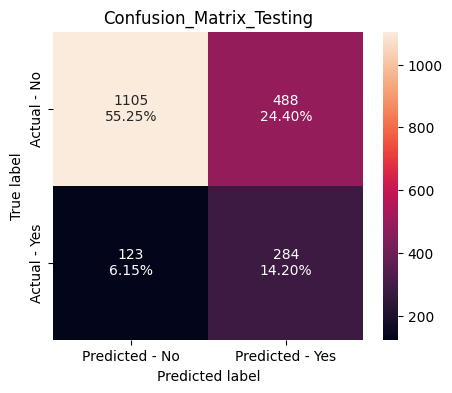

In [89]:
#Smote SGD with Momentum with 0.2 dropout
model_3 = results.iloc[14]['model']

# Predicting using the model and Converting the sigmoid output to binary
y3_test_predicted = model_3.predict(X_test) > 0.5
print ('model_3', model_3)

from sklearn import metrics
cr3= metrics.classification_report(y_test,y3_test_predicted)
print(cr3)

make_confusion_matrix('Confusion_Matrix_Testing',y_test, y3_test_predicted)

### **Conclusion:**

Overall, the 10000 records provided in the data set wasnt balanced in terms of customers churn out. Only 20% of the records had customers who actually churned out, so it was an imbalanced.

As the number of records were very low, I have used three hidden layer architecture with relu as activation function. Since the output is a binary classification, used stigmoid function. For performance improvement testing , introduced 2 dropout layers and tested the optimizers with 0.2 and 0.3 dropout ratios.

With default parameters of optimizer, Neural network training on the data provided poor recall scores. Hence the data had to be oversampled to improve the Neural netwok's ability to predict the customer behaviour. SMOTE technique was used to oversample the data and it yieled better results than using data as is.

In this case, Recall was the  metrics to be used, as finding the potential customer who would leave is very critical. All the best fit models from the data was able to predict approx 70% of the customer behaviours correctly. Approx 7% of the customers who would leave were not identified correctly across all models. 'Oversampled data with Adam optimizer with a dropput rate 0.2' was the best fit model out of all the models here.

Below are the actionable insights and recommendations based on the models.

## Actionable Insights and Business Recommendations


**Actionable insights:**

*   Create a customer service survey/feedback for existing German customers to find the rootcause of higher churn out rate among Germans
*   Customers who tend to use multiple bank products tend to stay longer with the bank, but as per the data, it was noticed that 100% of the people who used 4 bank products left, which translates one of the products had 100% churn out. This requires attention and action.

**Recommendations:**

*   Age of a customer is strongly correlated to customer longetivity with the bank, so targetting young customers to be engaged in bank products will help to stay
*   Customers with 0 bank balances could potentially leave the bank. Bank can Identify customers with a good Credit score but a zero bank accounts and promote them to use bank products through lucrative offers.






<font size=6 color='blue'>Power Ahead</font>
___